# Project 5 - OLS

## Regression Function

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Imported data to use
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = [0,1], 
                   parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          11285.0  
         2015-01-01          10947.0  
         2014-01-01          10703.0  
         2013-01-01          10138.0  
...                              ...  
ZWE      2000-01-01           2696.0  
         1995-01-01           2841.0  
         1990-01-01           3265.0  
         1985-01-01           3615.0  
         1980-01-01           4003.0  

[3030 rows x 7 columns]

In [2]:
# Changes the years to start from earliest to latest
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))

# Creates the data range
years = pd.date_range(years[0], years[-2], freq = "AS")

# Creates countries
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))

# Names the indeces
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries,
                                         years[:-1]],
                                        names = data.index.names)

multi_index

MultiIndex([('AGO', '1970-01-01'),
            ('AGO', '1971-01-01'),
            ('AGO', '1972-01-01'),
            ('AGO', '1973-01-01'),
            ('AGO', '1974-01-01'),
            ('AGO', '1975-01-01'),
            ('AGO', '1976-01-01'),
            ('AGO', '1977-01-01'),
            ('AGO', '1978-01-01'),
            ('AGO', '1979-01-01'),
            ...
            ('ZWE', '2006-01-01'),
            ('ZWE', '2007-01-01'),
            ('ZWE', '2008-01-01'),
            ('ZWE', '2009-01-01'),
            ('ZWE', '2010-01-01'),
            ('ZWE', '2011-01-01'),
            ('ZWE', '2012-01-01'),
            ('ZWE', '2013-01-01'),
            ('ZWE', '2014-01-01'),
            ('ZWE', '2015-01-01')],
           names=['ISO_Code', 'Year'], length=7452)

In [3]:
data = data.reindex(multi_index)
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1623.0  
         2013-01-01           1801.0  
         2014-01-01           1797.0  
         2015-01-01           1759.0  

[7452 rows x 7 columns]

In [4]:
# Calculates the log value by the RGDP Per Capita column
data['RGDP Per Capita Log Value'] = np.log(data["RGDP Per Capita"])

data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Log Value  
ISO_Code Year                                                    
AGO      1970-01-01              NaN                        NaN  
         1971-01-01              NaN                        NaN  
         1972-01-01              NaN                        NaN  
         1973-01-01              NaN                        NaN  
         1974-01-01              NaN                        NaN  
...                              ...                        ...  
ZWE      2011-01-01           1515.0                   7.323171  
         2012-01-01           1623.0                   7.392032  
         2013-01-01           1801.0                   7.496097  
         2014-01-01           1797.0                   7.493874  
         2015-01-01           1759.0                   7.472501  

[7452 rows x 8 columns]

In [5]:
# Makes sure lag variables are sorted correctly
# Chooses RGDP Per Capita from ISO_Code
# .shift moves values down one
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()

data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Log Value  \
ISO_Code Year                                                     
AGO      1970-01-01              NaN                        NaN   
         1971-01-01              NaN                        NaN   
         1972-01-01              NaN                        NaN   
         1973-01-01              NaN                        NaN   
         1974-01-01              NaN                        NaN   
...                              ...                        ...   
ZWE      2011-01-01           1515.0                   7.323171   
         2012-01-01           1623.0                   7.392032   
         2013-01-01           1801.0                   7.496097   
         2014-01-01           1797.0                   7.493874   
         2015-01-01           1759.0                   7.472501   

                     RGDP Per Capita Lag  
ISO_Code Year                             
AGO      1970-01-01                  NaN  
         1971-01-01                  NaN  
         1972-01-01                  NaN  
         1973-01-01                  NaN  
         1974-01-01                  NaN  
...                                  ...  
ZWE      2011-01-01               1425.0  
         2012-01-01               1515.0  
         2013-01-01               1623.0  
         2014-01-01               1801.0  
         2015-01-01               1797.0  

[7452 rows x 9 columns]

## OLS Regression

In [6]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government",
         "Legal System & Property Rights",
         "Sound Money",
         "Freedom to trade internationally",
         "Regulation",
         "RGDP Per Capita Log Value"]
# Creates dataframe for the variables
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           3364.0            4.652865   
         2006-01-01           4558.0            5.342913   
         2007-01-01           5314.0            5.239228   
         2008-01-01           6318.0            5.307379   
         2009-01-01           5212.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1623.0            6.670469   
         2013-01-01           1801.0            6.325105   
         2014-01-01           1797.0            6.433165   
         2015-01-01           1759.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Log Value  
ISO_Code Year                                   
AGO      2005-01-01                   8.120886  
         2006-01-01                   8.424639  
         2007-01-01                   8.578100  
         2008-01-01                   8.751158  
         2009-01-01                   8.558719  
...                                        ...  
ZWE      2011-01-01                   7.323171  
         2012-01-01                   7.392032  
         2013-01-01                   7.496097  
         2014-01-01                   7.493874  
         2015-01-01                   7.472501  

[2579 rows x 7 columns]

In [7]:
reg_data.corr().round(2)

RGDP Per Capita  Size of Government  \
RGDP Per Capita                              1.00               -0.15   
Size of Government                          -0.15                1.00   
Legal System & Property Rights               0.68               -0.10   
Sound Money                                  0.44                0.20   
Freedom to trade internationally             0.49                0.24   
Regulation                                   0.50                0.21   
RGDP Per Capita Log Value                    0.83               -0.14   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita                                             0.68         0.44   
Size of Government                                         -0.10         0.20   
Legal System & Property Rights                              1.00         0.52   
Sound Money                                                 0.52         1.00   
Freedom to trade internationally                            0.63         0.68   
Regulation                                                  0.59         0.60   
RGDP Per Capita Log Value                                   0.75         0.51   

                                  Freedom to trade internationally  \
RGDP Per Capita                                               0.49   
Size of Government                                            0.24   
Legal System & Property Rights                                0.63   
Sound Money                                                   0.68   
Freedom to trade internationally                              1.00   
Regulation                                                    0.65   
RGDP Per Capita Log Value                                     0.59   

                                  Regulation  RGDP Per Capita Log Value  
RGDP Per Capita                         0.50                       0.83  
Size of Government                      0.21                      -0.14  
Legal System & Property Rights          0.59                       0.75  
Sound Money                             0.60                       0.51  
Freedom to trade internationally        0.65                       0.59  
Regulation                              1.00                       0.52  
RGDP Per Capita Log Value               0.52                       1.00

In [8]:
reg_data.describe().round(2)

RGDP Per Capita  Size of Government  Legal System & Property Rights  \
count          2579.00             2579.00                         2579.00   
mean          15913.65                6.35                            5.23   
std           17204.60                1.24                            1.74   
min             432.00                1.57                            0.99   
25%            3472.50                5.52                            3.96   
50%           10032.00                6.42                            5.17   
75%           23393.50                7.18                            6.35   
max          156144.00                9.51                            9.14   

       Sound Money  Freedom to trade internationally  Regulation  \
count      2579.00                           2579.00     2579.00   
mean          7.76                              6.90        6.66   
std           1.85                              1.52        1.17   
min           0.00                              0.00        2.10   
25%           6.74                              6.18        5.93   
50%           8.11                              7.15        6.75   
75%           9.32                              7.98        7.48   
max           9.89                             10.00        9.44   

       RGDP Per Capita Log Value  
count                    2579.00  
mean                        9.06  
std                         1.21  
min                         6.07  
25%                         8.15  
50%                         9.21  
75%                        10.06  
max                        11.96

In [9]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1060.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:06:46   Log-Likelihood:                -27207.
No. Observations:                2579   AIC:                         5.443e+04
Df Residuals:                    2572   BIC:                         5.447e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                -564.2162    169.720     -3.324      0.001    -897.018    -231.414
Legal System & Property Rights     982.9198    176.282      5.576      0.000     637.250    1328.590
Sound Money                         -9.0789    141.596     -0.064      0.949    -286.732     268.574
Freedom to trade internationally  -835.3789    198.009     -4.219      0.000   -1223.652    -447.106
Regulation                        1742.2838    225.876      7.713      0.000    1299.366    2185.202
RGDP Per Capita Log Value         1.048e+04    240.436     43.577      0.000       1e+04    1.09e+04
Constant                         -8.636e+04   1979.677    -43.624      0.000   -9.02e+04   -8.25e+04
==============================================================================
Omnibus:                     2283.913   Durbin-Watson:                   0.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115002.531
Skew:                           3.992   Prob(JB):                         0.00
Kurtosis:                      34.725   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Creates the predictor
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor

## OLS Statistics

In [11]:
# Renaming y_var[0] for readability
y_name = y_var[0]
y_hat = reg_data[y_name + " Predictor"]
y_mean = reg_data[y_name].mean()
y = reg_data[y_name]

# Calculating SSE, SSR, and SST
# Creates a residuals column
reg_data["Residuals"] = y_hat.sub(y_mean)

# Creating Squared Residuals
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)

# ** 2 squares the data
reg_data["Squared Errors"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2

reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           3364.0            4.652865   
         2006-01-01           4558.0            5.342913   
         2007-01-01           5314.0            5.239228   
         2008-01-01           6318.0            5.307379   
         2009-01-01           5212.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1623.0            6.670469   
         2013-01-01           1801.0            6.325105   
         2014-01-01           1797.0            6.433165   
         2015-01-01           1759.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Log Value  RGDP Per Capita Predictor  \
ISO_Code Year                                                               
AGO      2005-01-01                   8.120886                2227.851616   
         2006-01-01                   8.424639                6441.050435   
         2007-01-01                   8.578100                8543.192999   
         2008-01-01                   8.751158               10225.512869   
         2009-01-01                   8.558719                6692.819678   
...                                        ...                        ...   
ZWE      2011-01-01                   7.323171               -6283.962453   
         2012-01-01                   7.392032               -6688.279108   
         2013-01-01                   7.496097               -5902.986104   
         2014-01-01                   7.493874               -5981.935973   
         2015-01-01                   7.472501               -1170.412579   

                        Residuals  Squared Residuals  Squared Errors  \
ISO_Code Year                                                          
AGO      2005-01-01 -13685.793983       1.873010e+08    1.290833e+06   
         2006-01-01  -9472.595164       8.973006e+07    3.545879e+06   
         2007-01-01  -7370.452600       5.432357e+07    1.042769e+07   
         2008-01-01  -5688.132730       3.235485e+07    1.526866e+07   
         2009-01-01  -9

In [12]:
# Renames these columns
SSR = reg_data["Squared Residuals"].sum()
SSE = reg_data["Squared Errors"].sum()
SST = reg_data["Squared Totals"].sum()

## Estimator Variance

In [13]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)

In [14]:
cov_matrix = results.cov_params()
cov_matrix

Size of Government  \
Size of Government                      28804.909839   
Legal System & Property Rights           6231.311813   
Sound Money                             -2259.797892   
Freedom to trade internationally        -9284.191259   
Regulation                              -7104.329098   
RGDP Per Capita Log Value                9717.068820   
Constant                              -174556.070286   

                                  Legal System & Property Rights  \
Size of Government                                   6231.311813   
Legal System & Property Rights                      31075.501695   
Sound Money                                          -785.775362   
Freedom to trade internationally                    -8285.601811   
Regulation                                         -10038.157591   
RGDP Per Capita Log Value                          -20647.264958   
Constant                                           115270.859809   

                                   Sound Money  \
Size of Government                -2259.797892   
Legal System & Property Rights     -785.775362   
Sound Money                       20049.337396   
Freedom to trade internationally -10095.346062   
Regulation                        -7051.671005   
RGDP Per Capita Log Value         -4173.382303   
Constant                          17358.624572   

                                  Freedom to trade internationally  \
Size of Government                                    -9284.191259   
Legal System & Property Rights                        -8285.601811   
Sound Money                                          -10095.346062   
Freedom to trade internationally                      39207.549038   
Regulation                                            -9265.039738   
RGDP Per Capita Log Value                             -8928.287405   
Constant                                              52500.876296   

                                    Regulation  RGDP Per Capita Log Value  \
Size of Government                -7104.329098                9717.068820   
Legal System & Property Rights   -10038.157591              -20647.264958   
Sound Money                       -7051.671005               -4173.382303   
Freedom to trade internationally  -9265.039738               -8928.287405   
Regulation                        51020.083860               -3490.331920   
RGDP Per Capita Log Value         -3490.331920               57809.315623   
Constant                         -91720.012546             -360482.848535   

                                      Constant  
Size of Government               -1.745561e+05  
Legal System & Property Rights    1.152709e+05  
Sound Money                       1.735862e+04  
Freedom to trade internationally  5.250088e+04  
Regulation                       -9.172001e+04  
RGDP Per Capita Log Value        -3.604828e+05  
Constant                          3.919121e+06

## Calculating T-stats

In [15]:
parameters = {}
for x_var in X.keys():
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var,x_var] ** (1/2)
    parameters[x_var]["t_stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"]

pd.DataFrame(parameters).T

Beta  Standard Error    t_stats
Size of Government                 -564.216217      169.720093  -3.324393
Legal System & Property Rights      982.919822      176.282449   5.575824
Sound Money                          -9.078920      141.595683  -0.064119
Freedom to trade internationally   -835.378900      198.008962  -4.218894
Regulation                         1742.283786      225.876258   7.713444
RGDP Per Capita Log Value         10477.378188      240.435679  43.576637
Constant                         -86361.275684     1979.676961 -43.623923

In [16]:
r2 = SSR / SST

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1060.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:06:47   Log-Likelihood:                -27207.
No. Observations:                2579   AIC:                         5.443e+04
Df Residuals:                    2572   BIC:                         5.447e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                -564.2162    169.720     -3.324      0.001    -897.018    -231.414
Legal System & Property Rights     982.9198    176.282      5.576      0.000     637.250    1328.590
Sound Money                         -9.0789    141.596     -0.064      0.949    -286.732     268.574
Freedom to trade internationally  -835.3789    198.009     -4.219      0.000   -1223.652    -447.106
Regulation                        1742.2838    225.876      7.713      0.000    1299.366    2185.202
RGDP Per Capita Log Value         1.048e+04    240.436     43.577      0.000       1e+04    1.09e+04
Constant                         -8.636e+04   1979.677    -43.624      0.000   -9.02e+04   -8.25e+04
==============================================================================
Omnibus:                     2283.913   Durbin-Watson:                   0.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115002.531
Skew:                           3.992   Prob(JB):                         0.00
Kurtosis:                      34.725   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plotting Residuals

(array([-50000., -40000., -30000., -20000., -10000.,      0.,  10000.,
         20000.,  30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

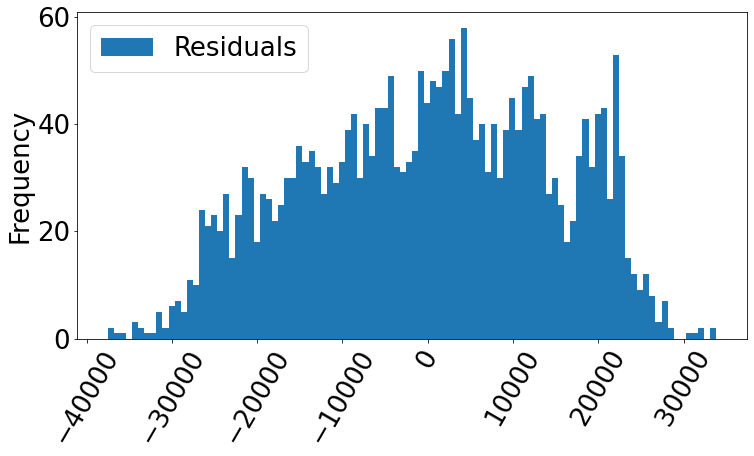

In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 26})
fig, ax = plt.subplots(figsize = (12, 6))
reg_data[["Residuals"]].plot.hist(bins = 100, 
                                  ax = ax)
plt.xticks(rotation = 60)

The shape of the distribution of these residuals are distinct from the shape of the redisuals plotted in the first regression from this lesson because the log values are included. Logging data lesses the skewness of the distribution. This causes the overall shape of the distribution to change.

## Plotting RGDP Per Capita by Predictor

Text(0, 0.5, 'Predictor')

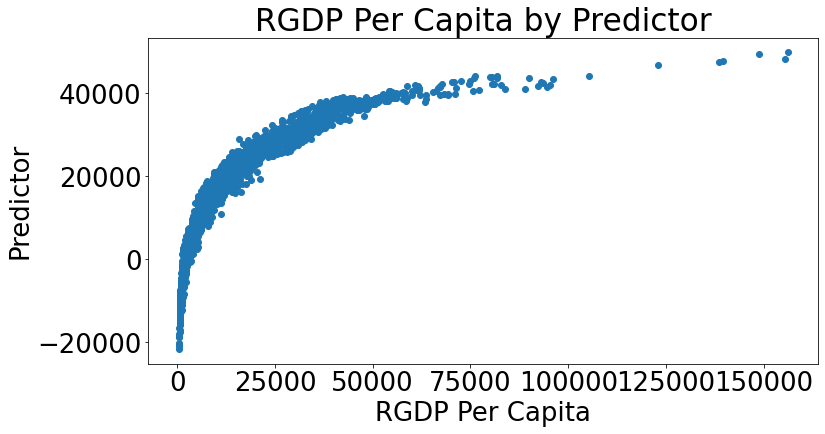

In [19]:
# Create a scatter plot for RGDP Per Capita by Predictor
fig, ax = plt.subplots(figsize = (12, 6))

ax.scatter(reg_data['RGDP Per Capita'], reg_data['RGDP Per Capita Predictor'])
ax.set_title('RGDP Per Capita by Predictor')
ax.set_xlabel('RGDP Per Capita')
ax.set_ylabel('Predictor')

## Plotting RDGP Per Capita and Residual

Text(0, 0.5, 'Residual')

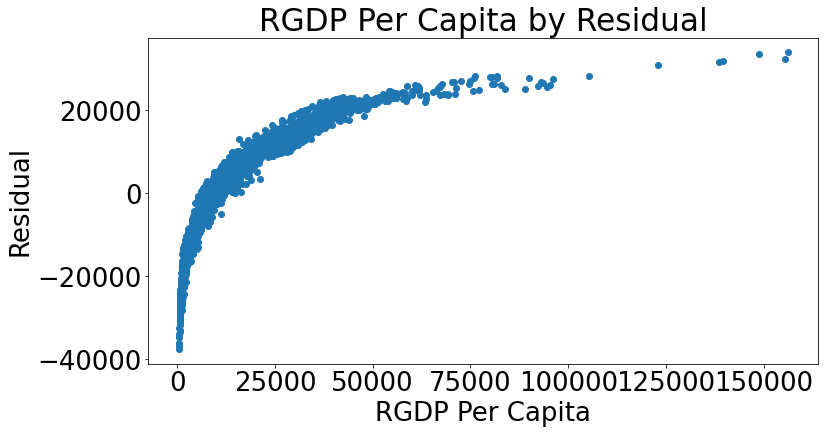

In [20]:
# Create a scatter plot for RGDP Per Capita by Residual
fig, ax = plt.subplots(figsize = (12, 6))

ax.scatter(reg_data['RGDP Per Capita'], reg_data['Residuals'])
ax.set_title('RGDP Per Capita by Residual')
ax.set_xlabel('RGDP Per Capita')
ax.set_ylabel('Residual')

The residuals are not normally distributed. If they were, the dots would form a straight, diagonal line. This may be because this data is being analyzed after it has been sorted and cleaned. It is a subset of the total output. This matters because a normal distribution is desired when dealing with data. 

## Plotting Observed and Predicted Logged Values of RGDP Per Capita for each Country

<ipython-input-21-21170d447a79>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


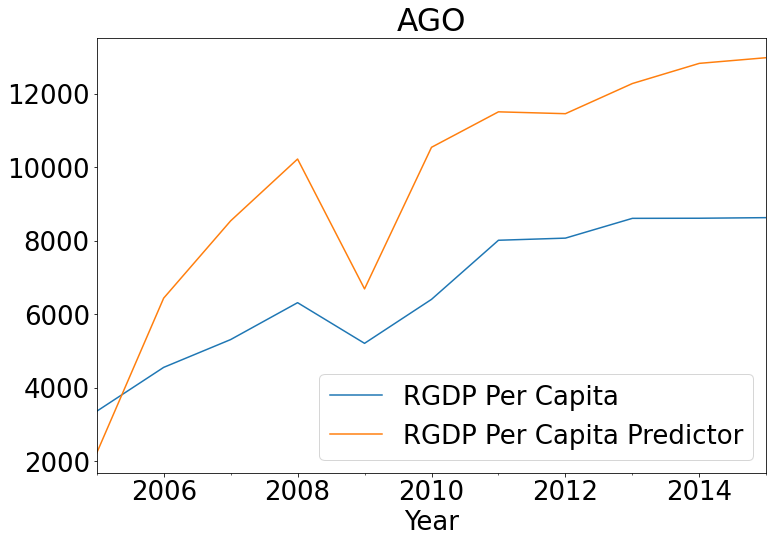

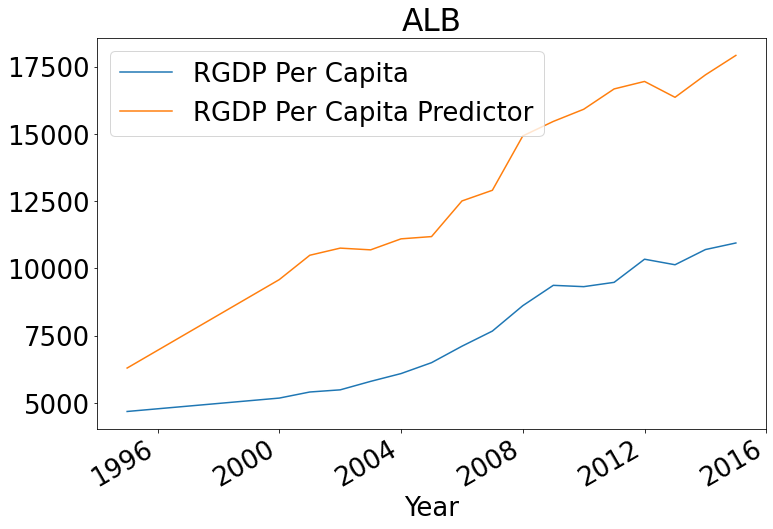

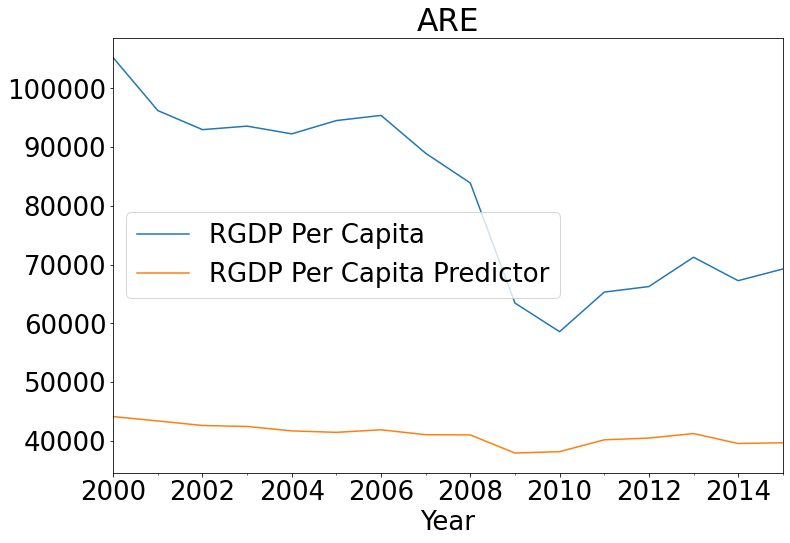

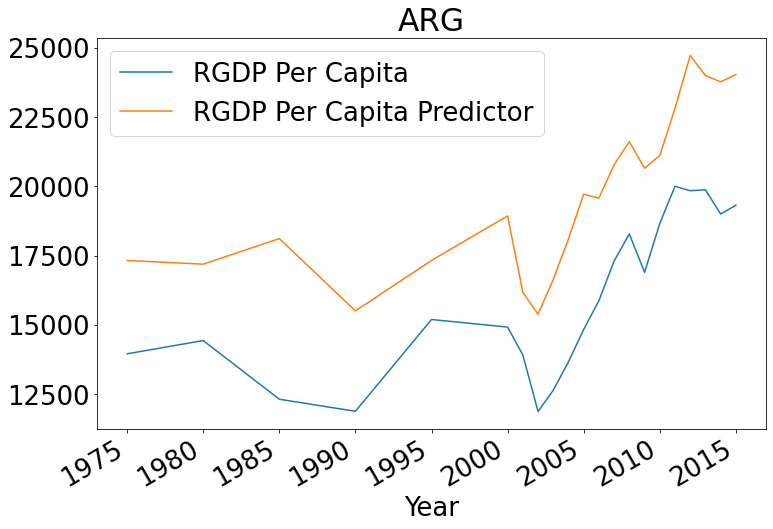

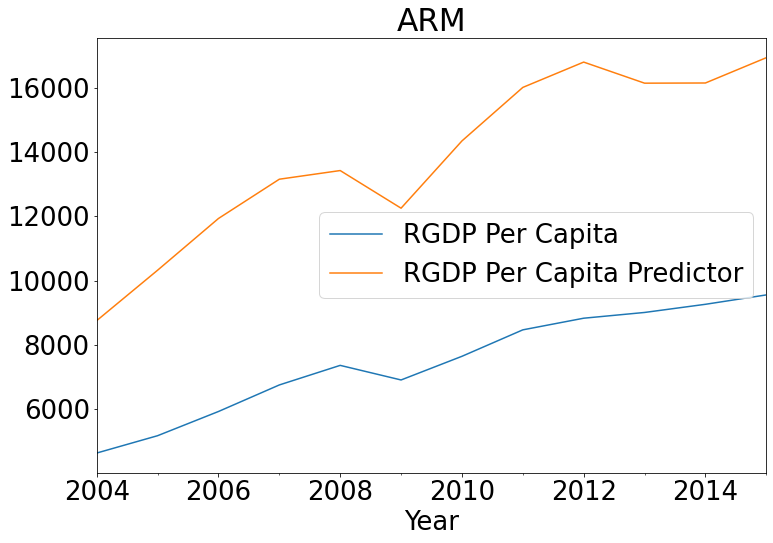

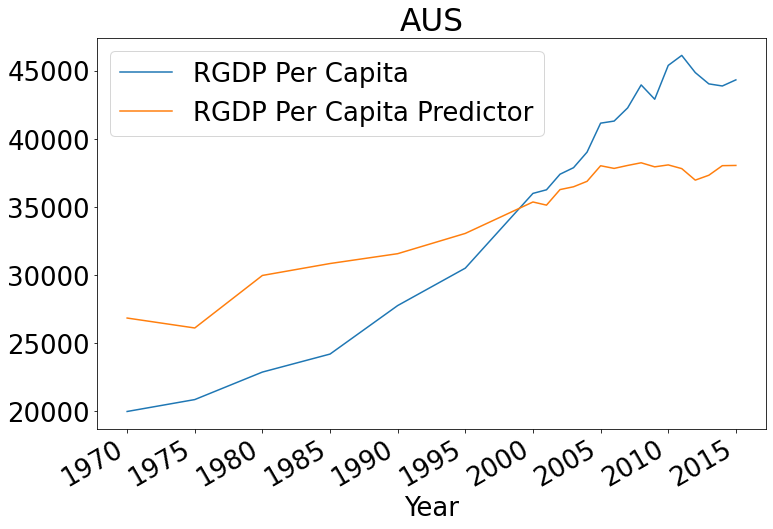

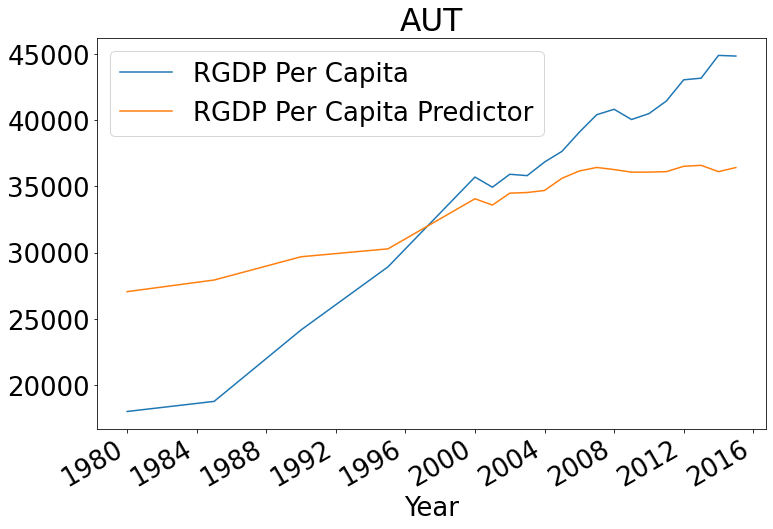

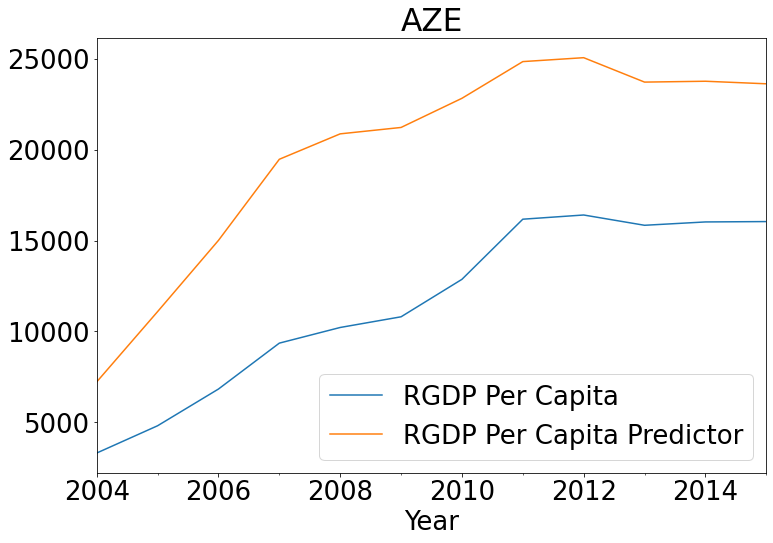

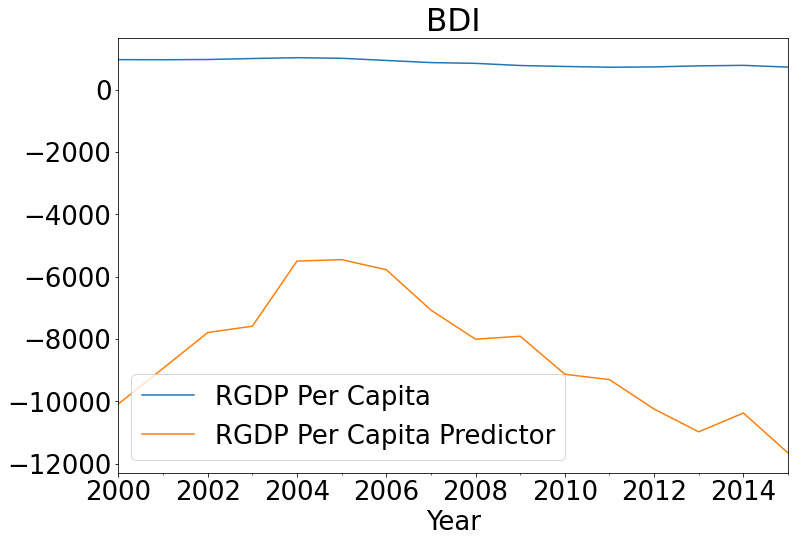

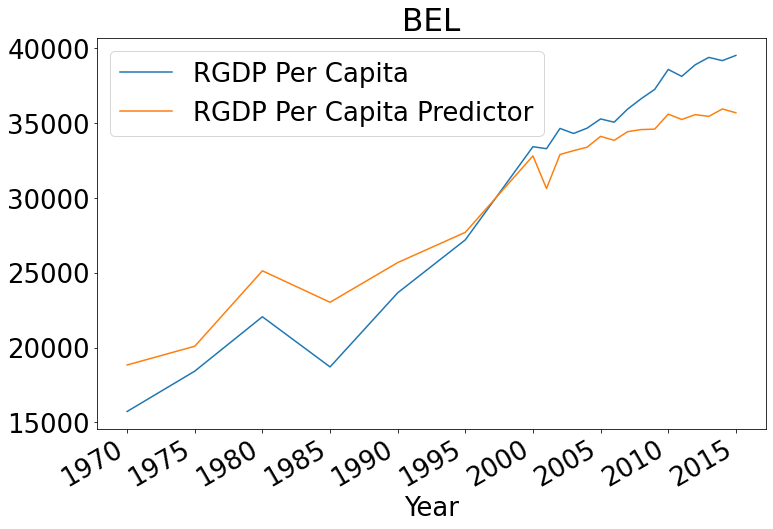

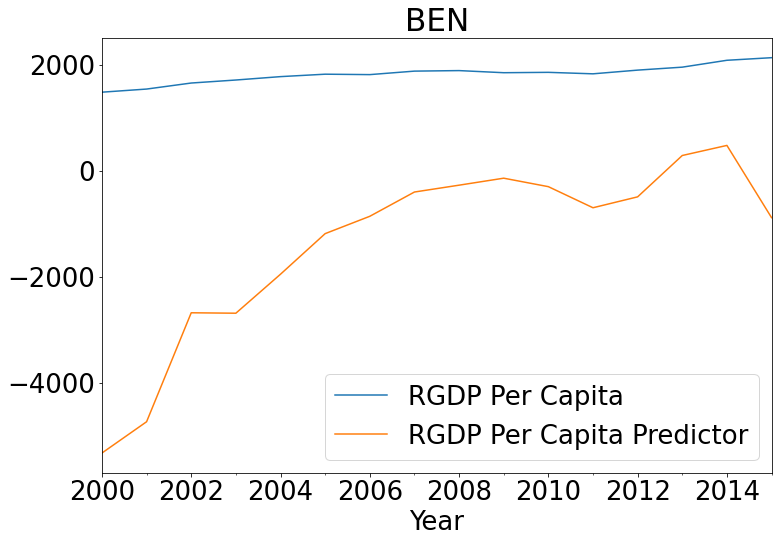

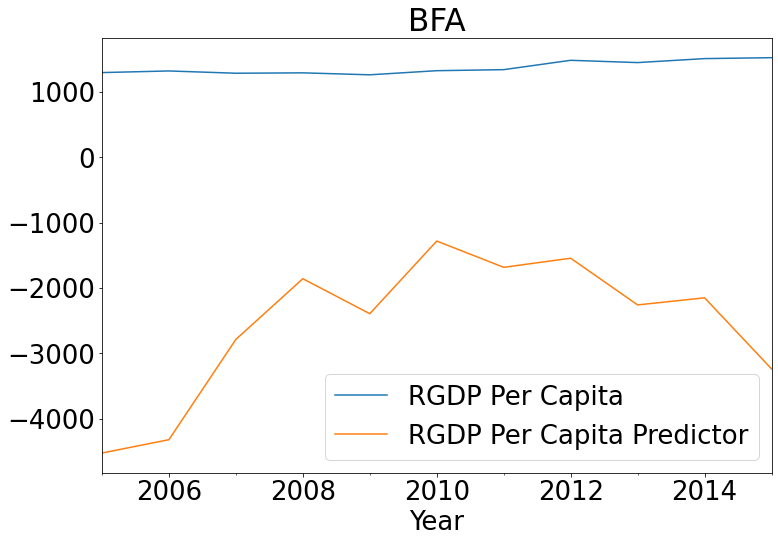

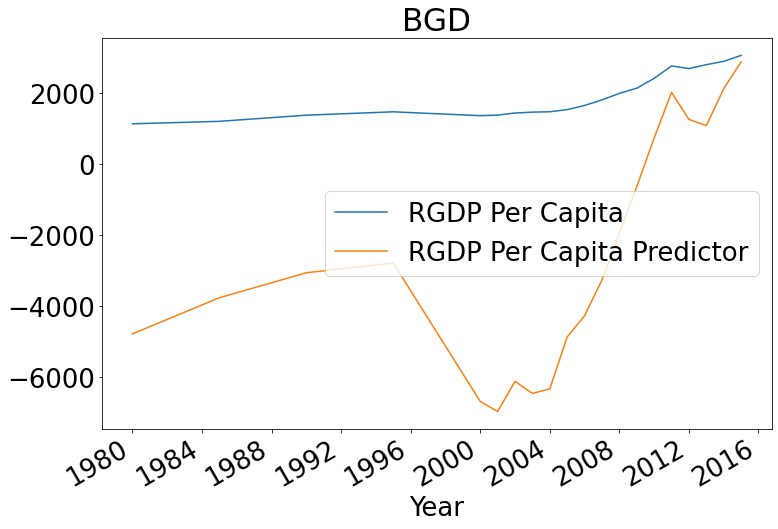

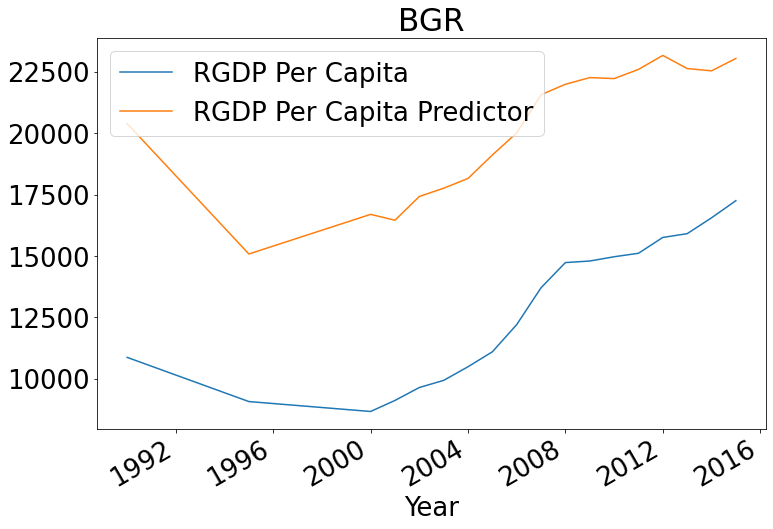

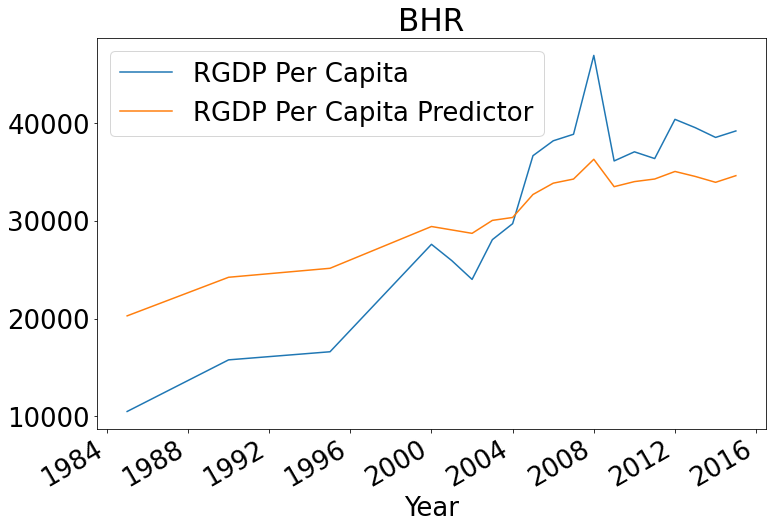

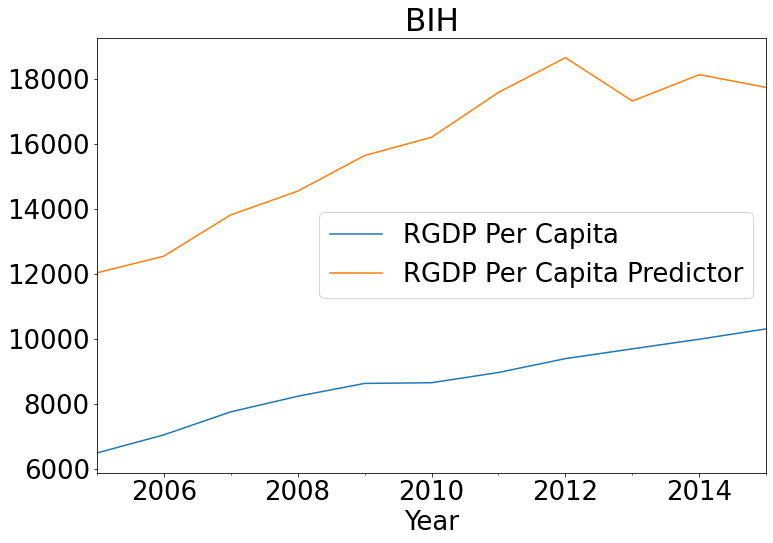

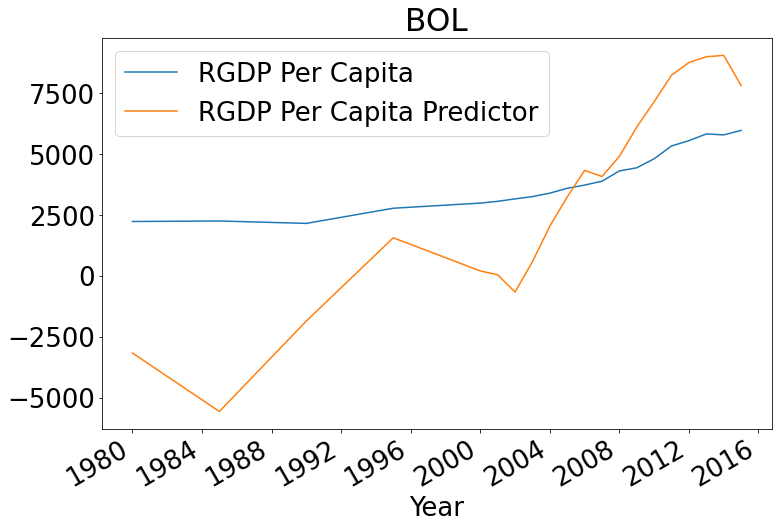

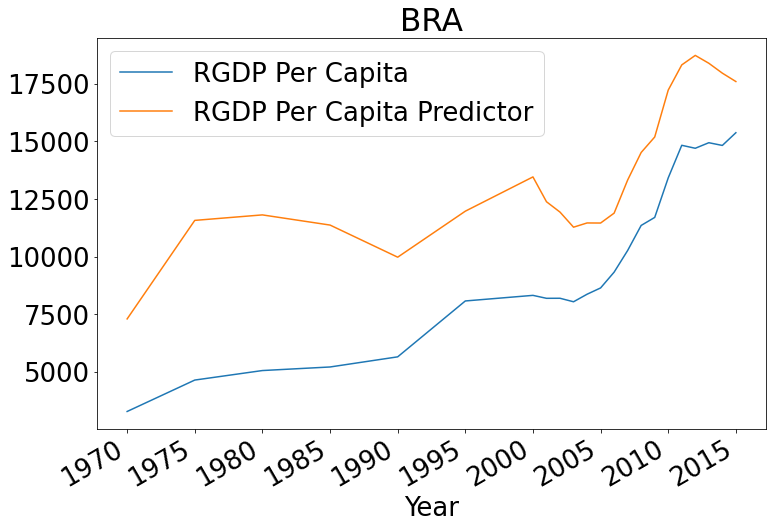

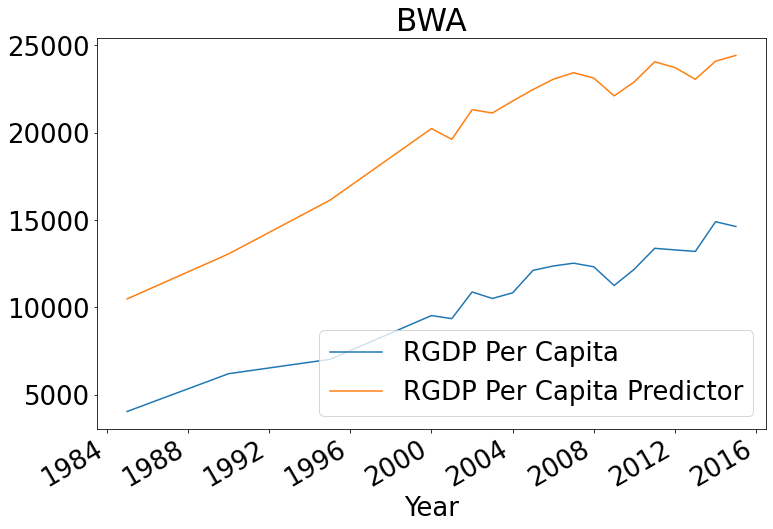

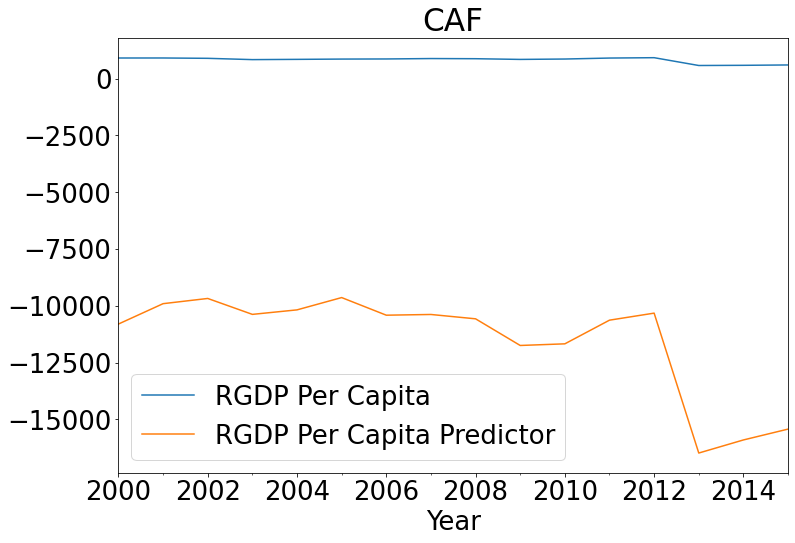

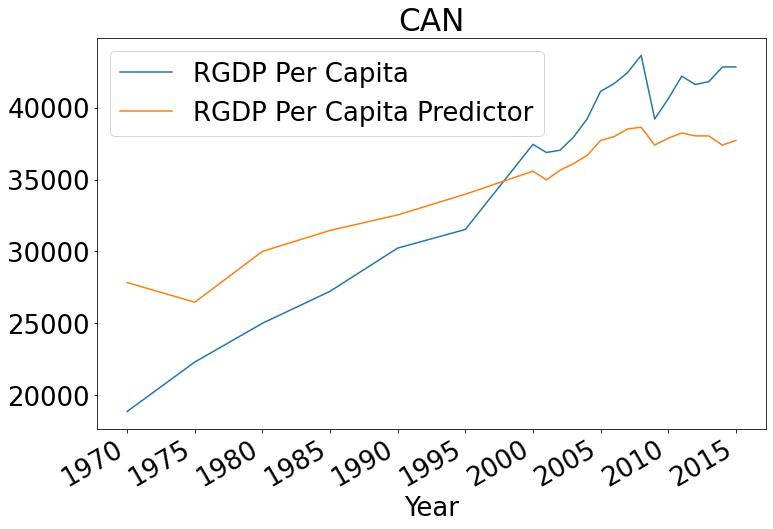

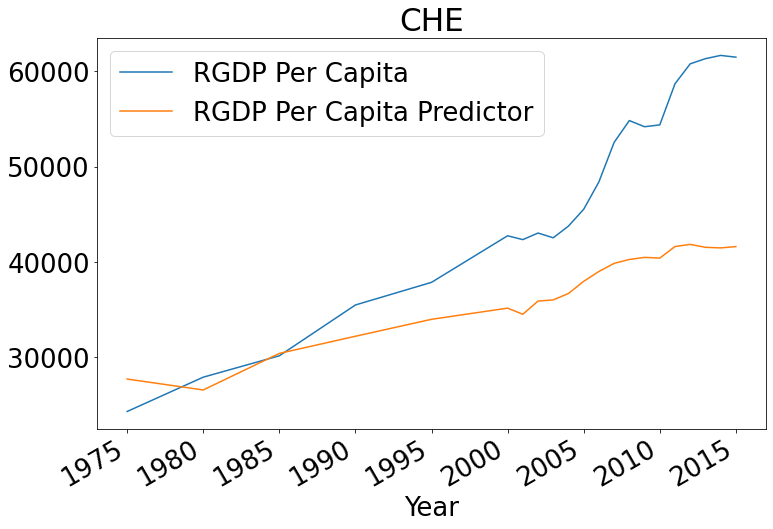

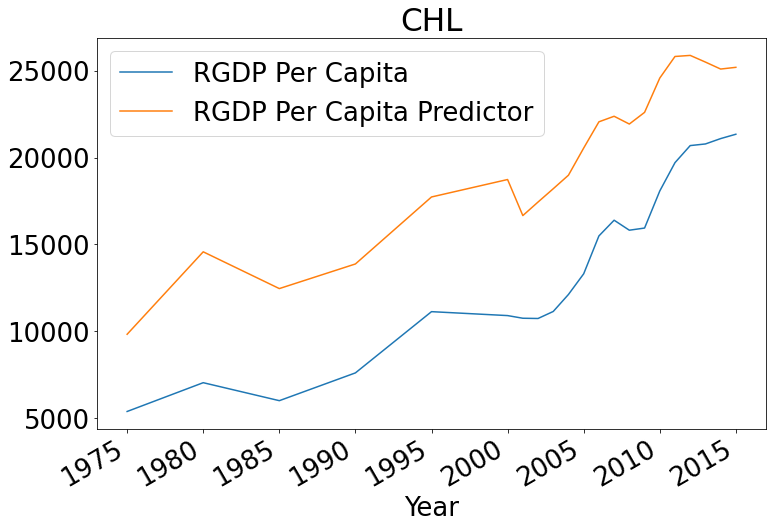

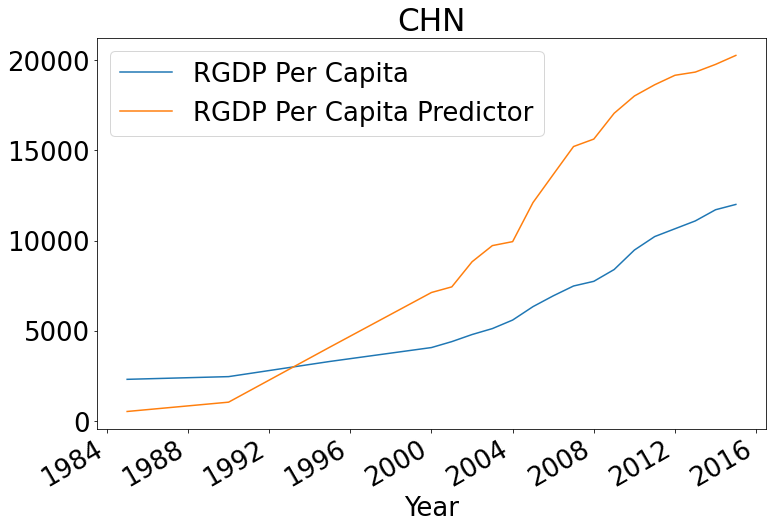

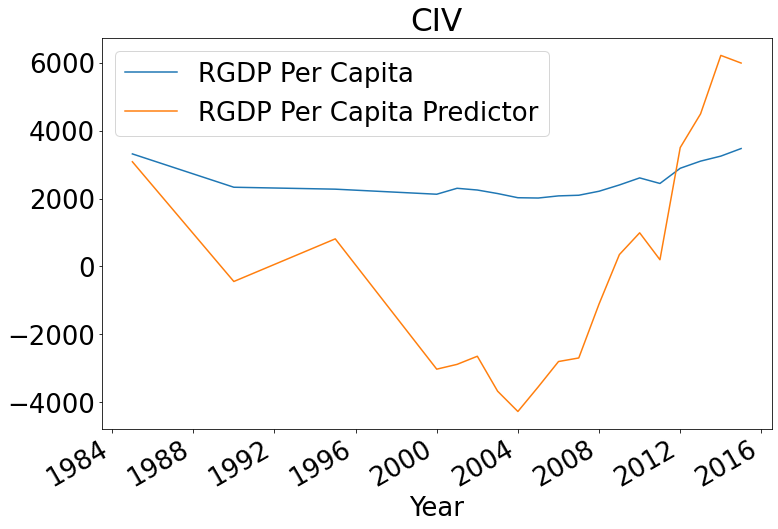

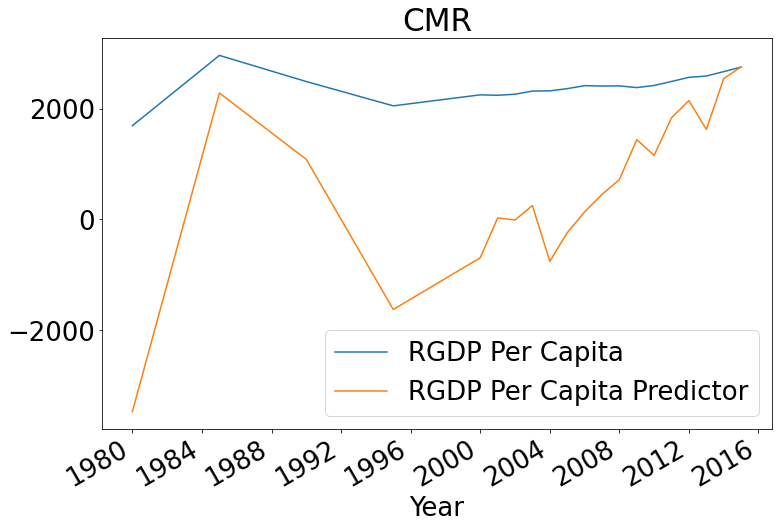

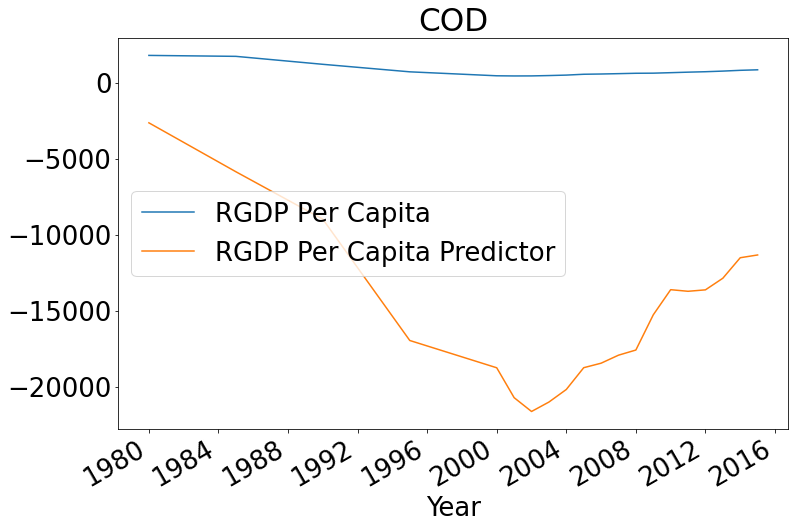

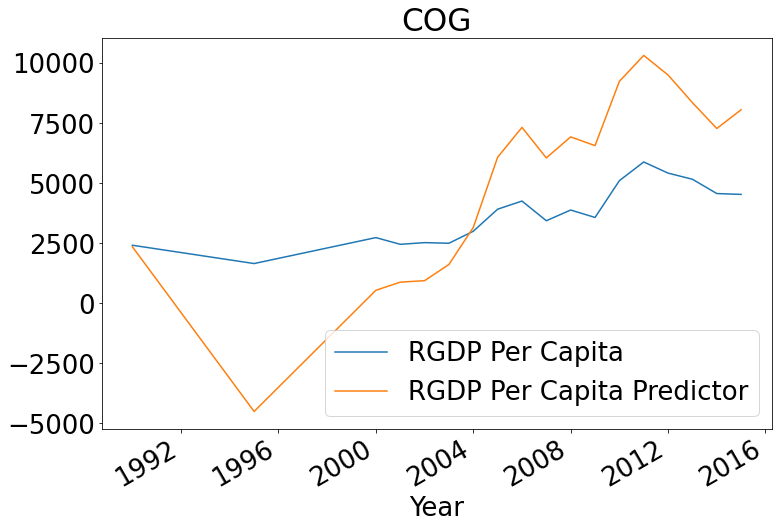

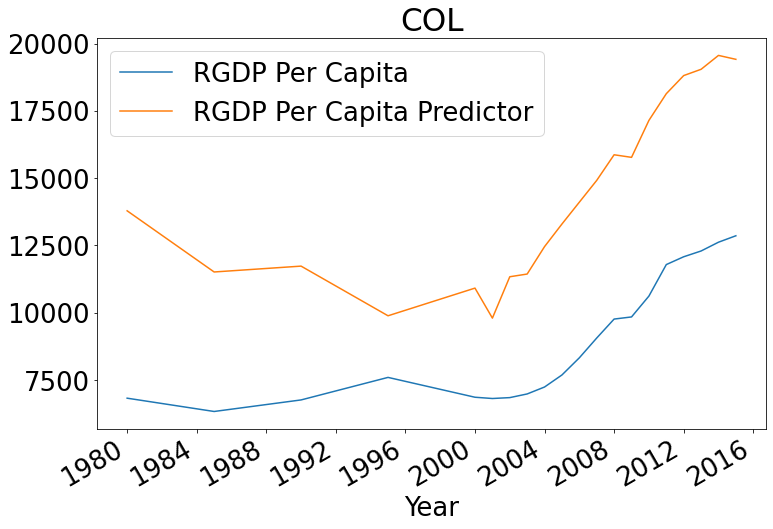

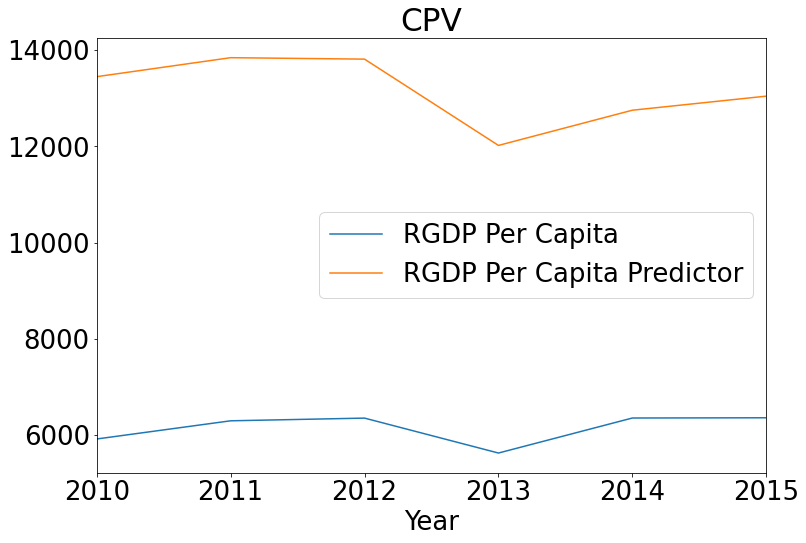

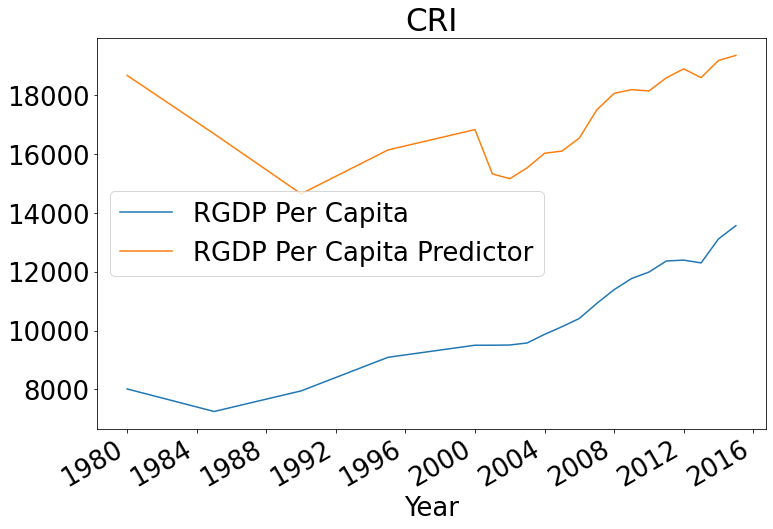

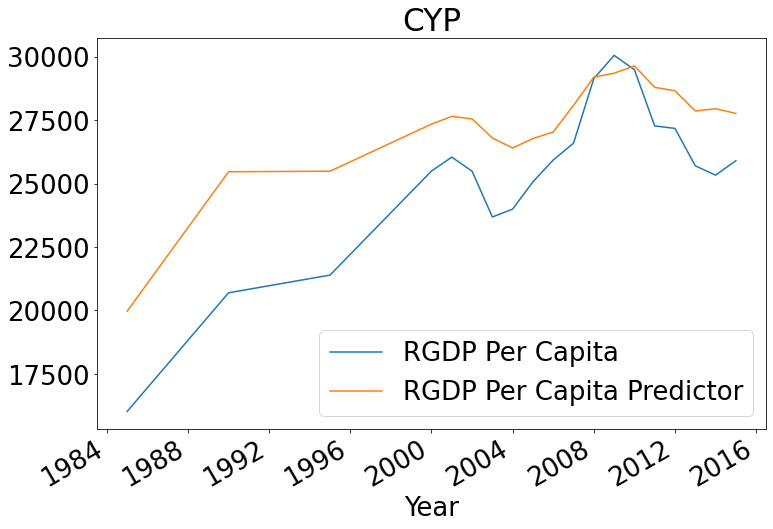

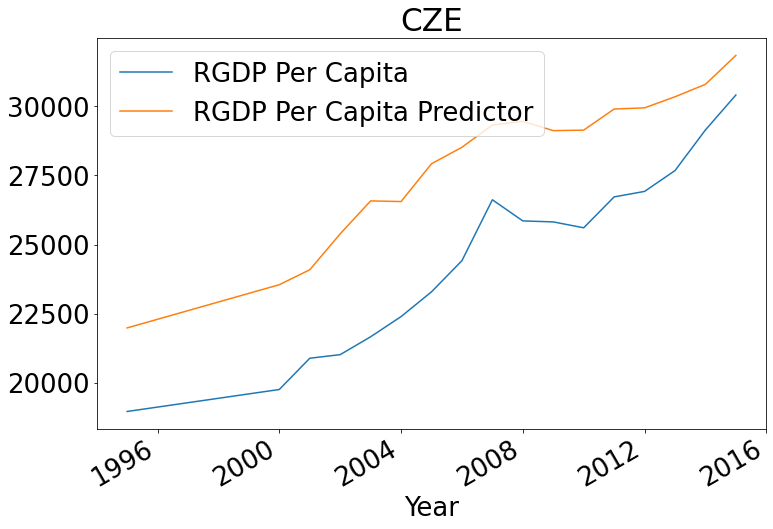

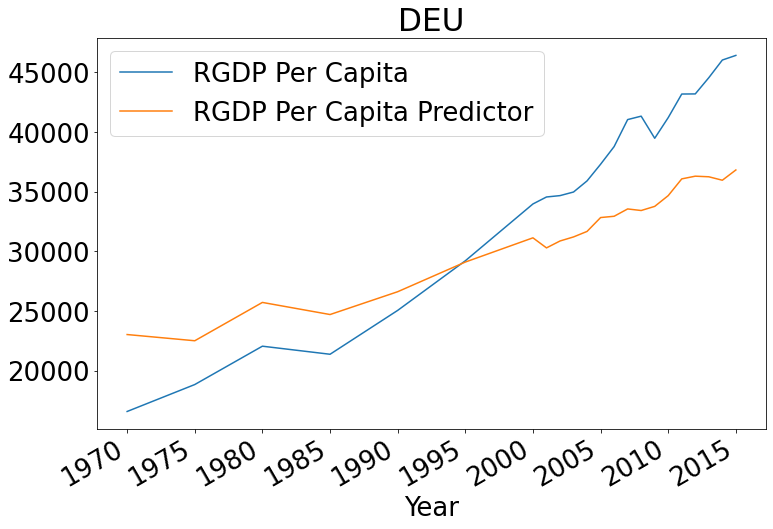

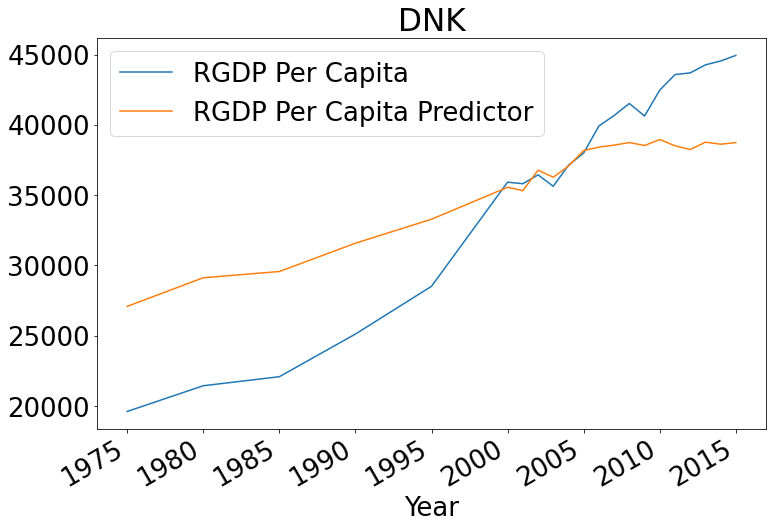

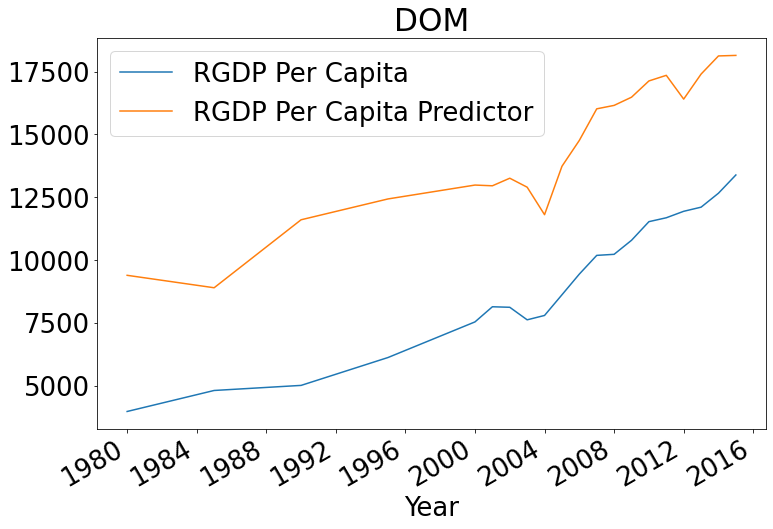

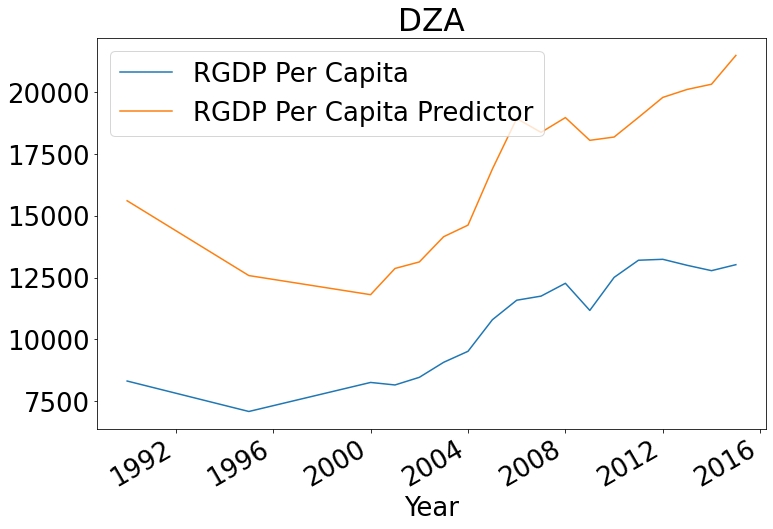

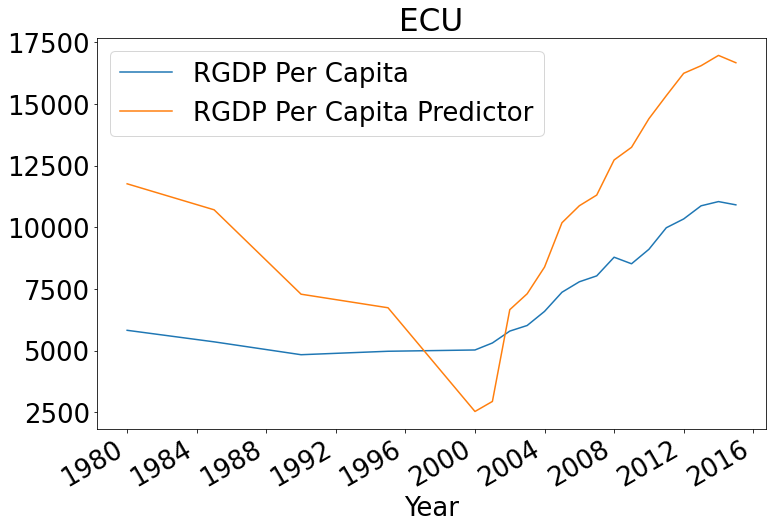

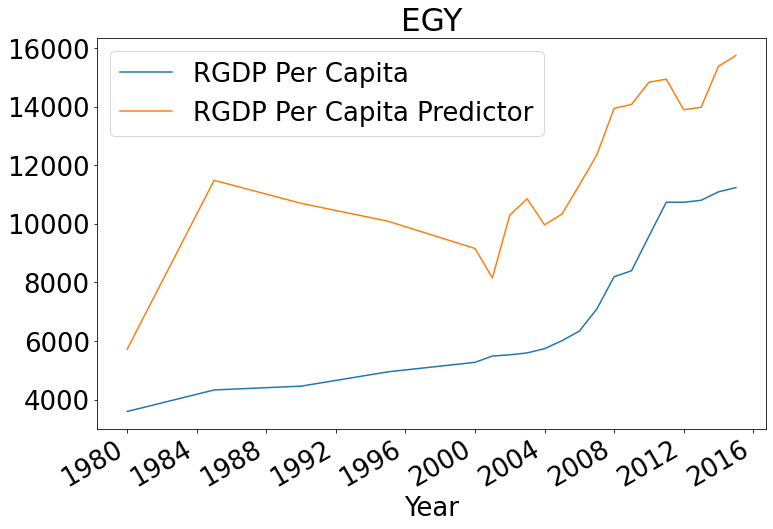

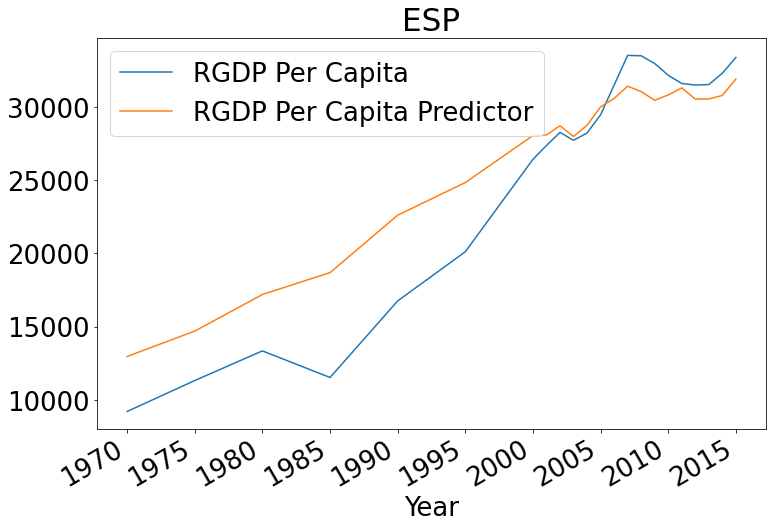

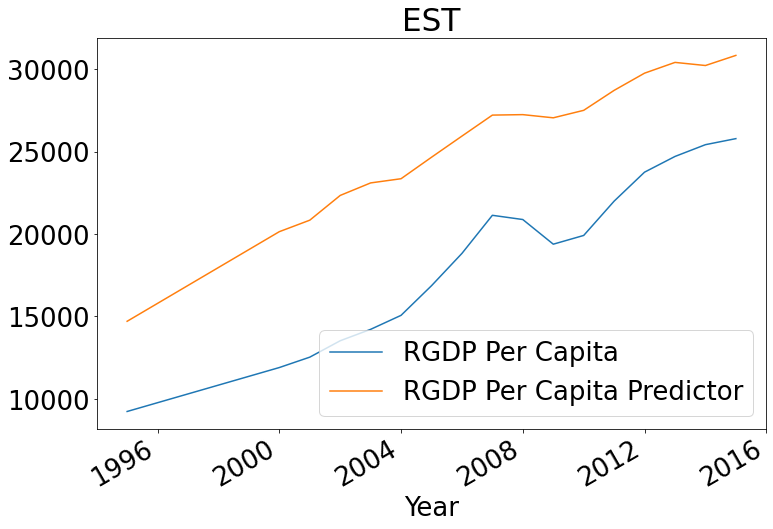

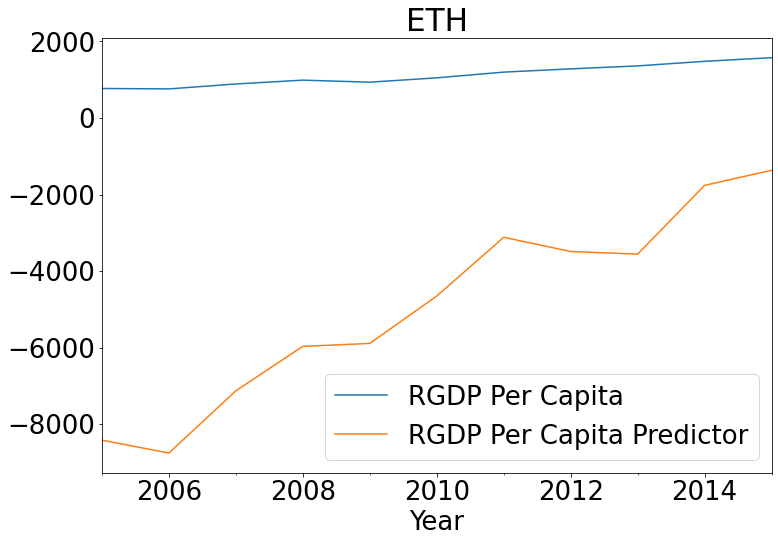

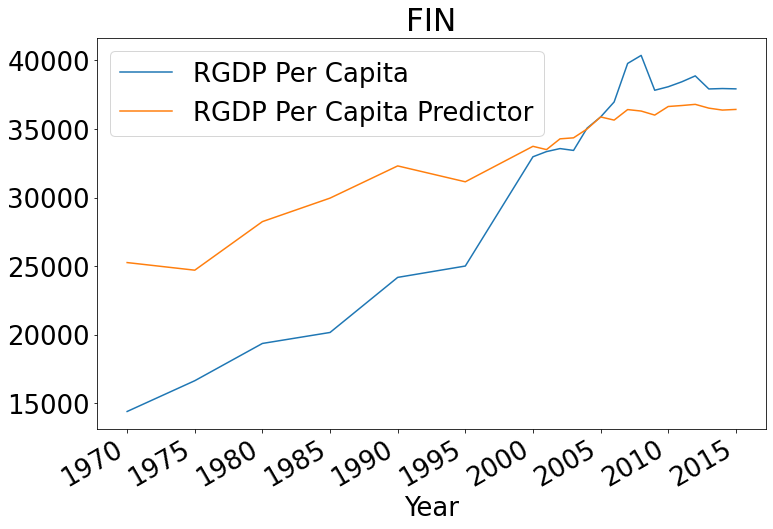

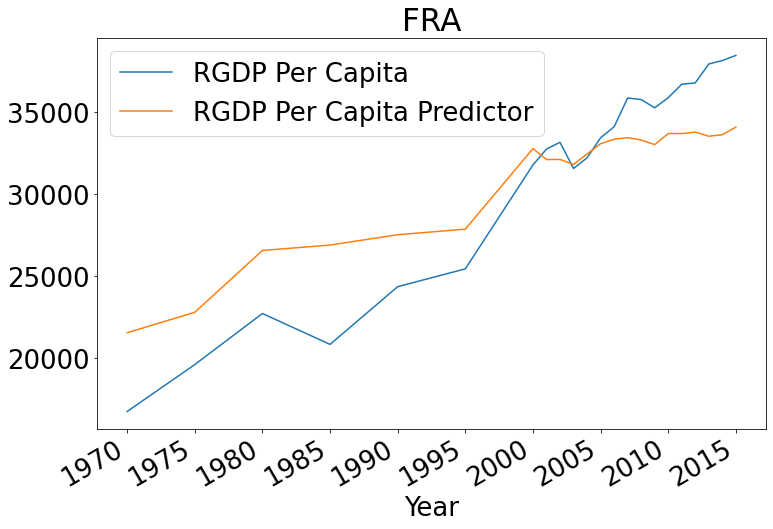

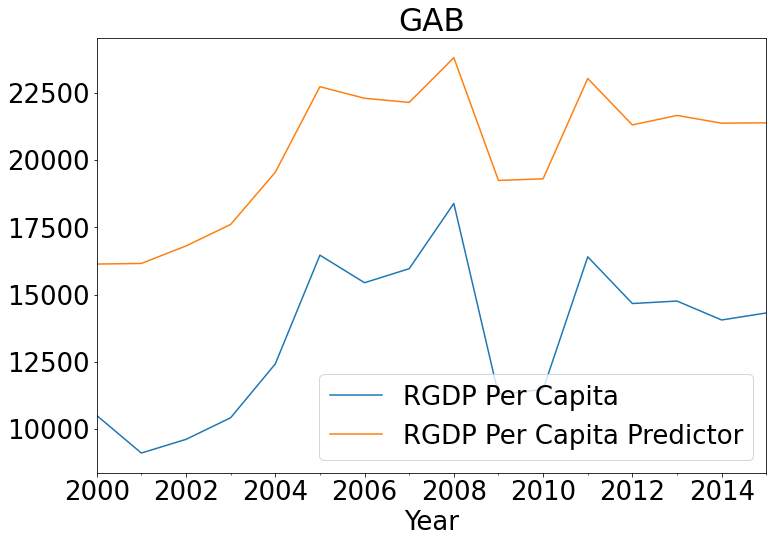

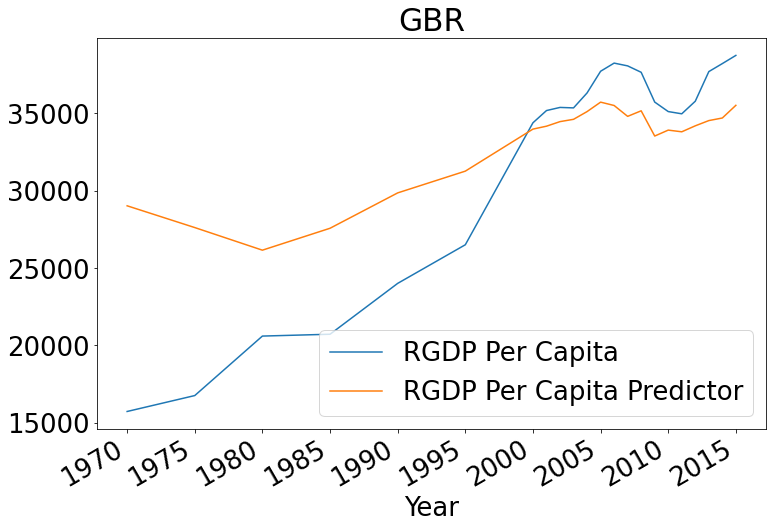

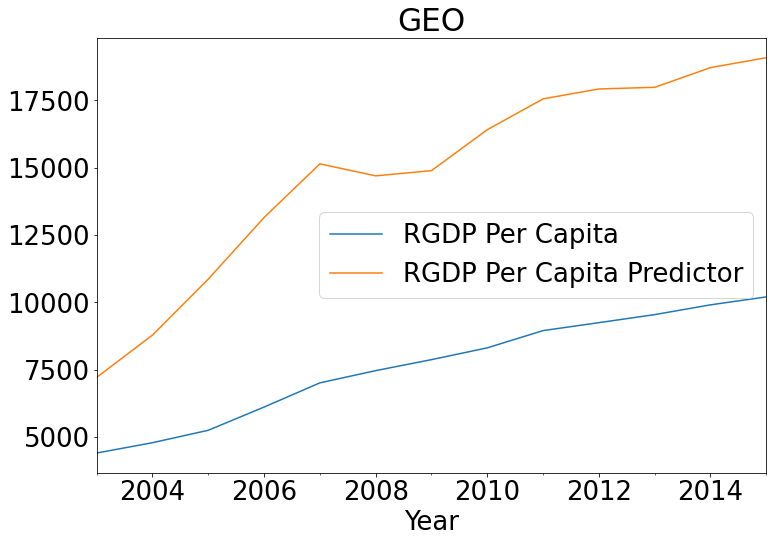

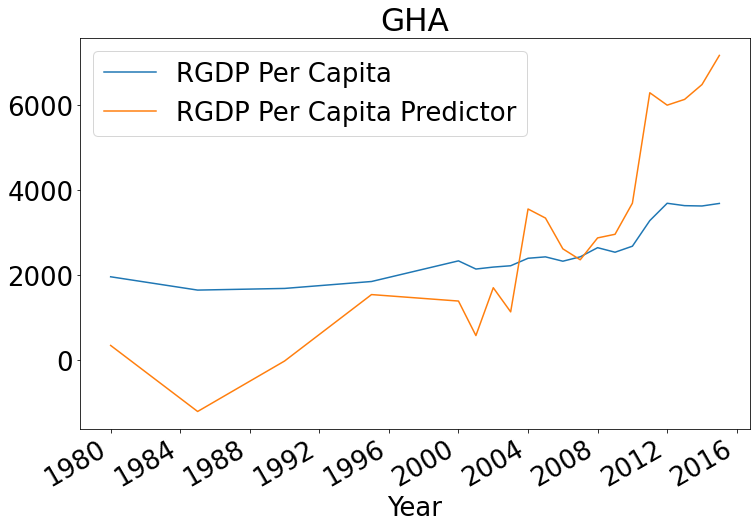

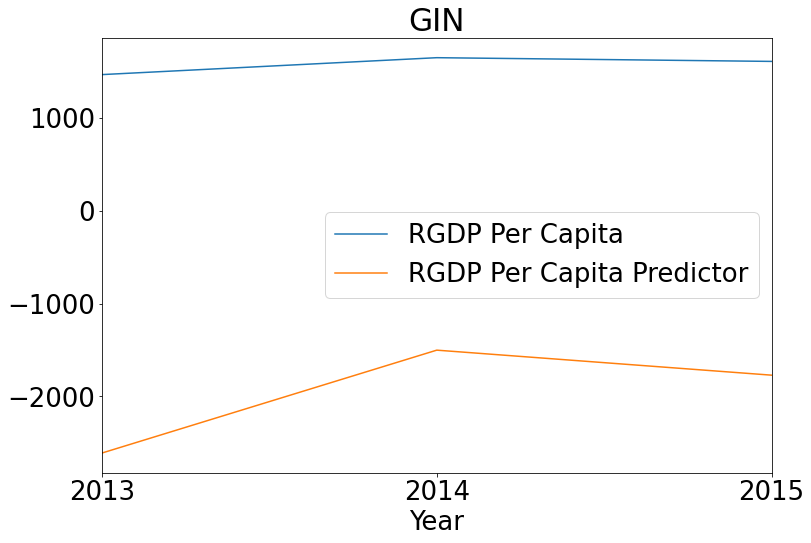

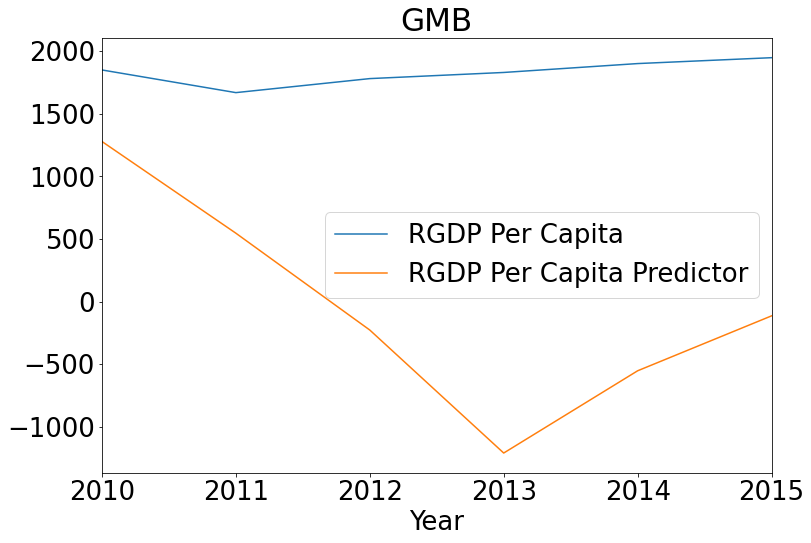

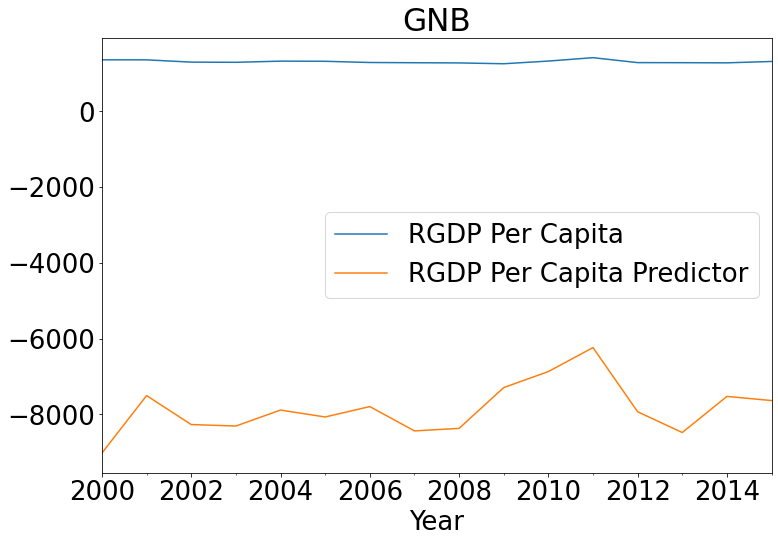

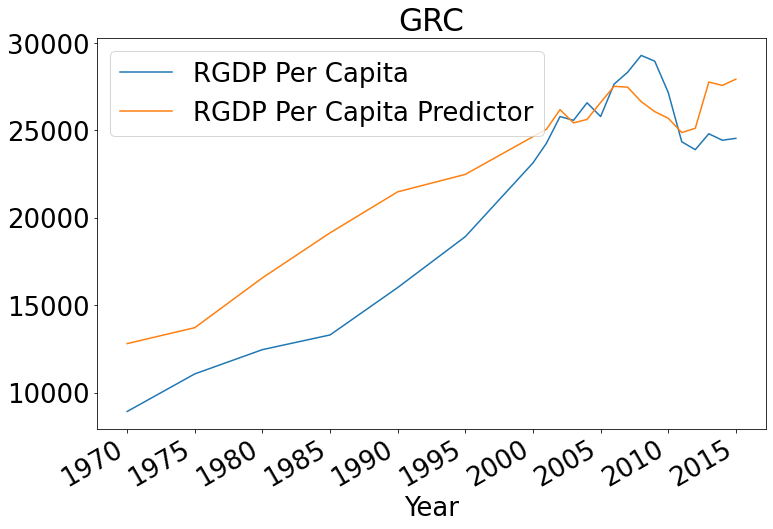

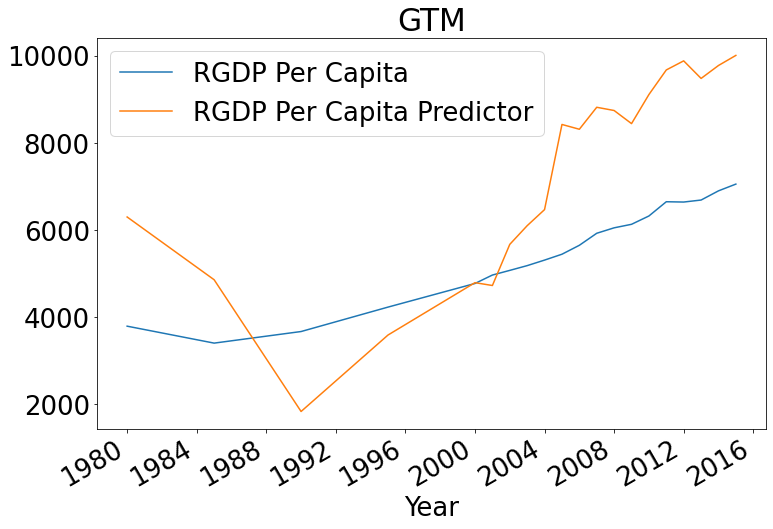

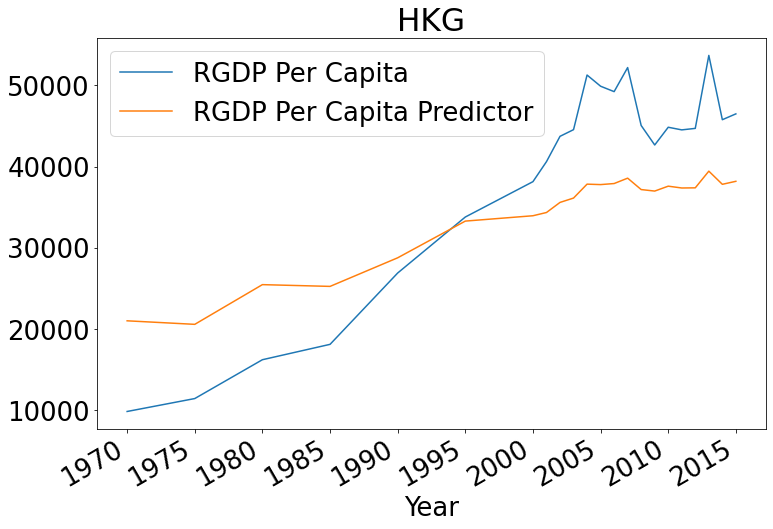

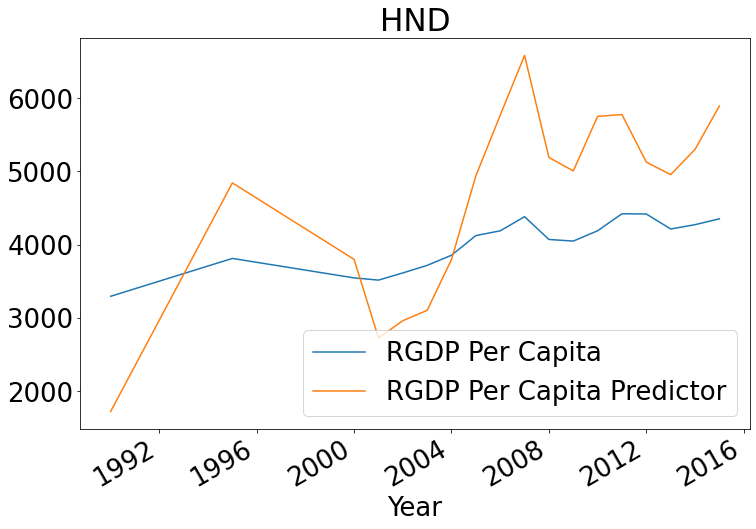

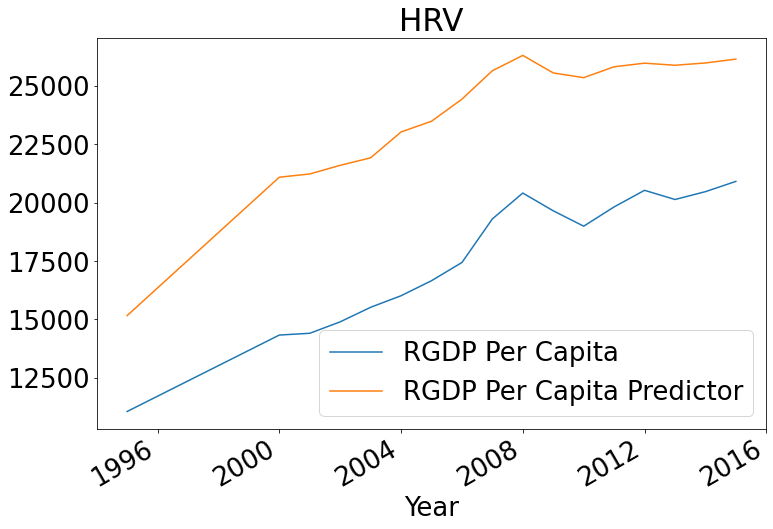

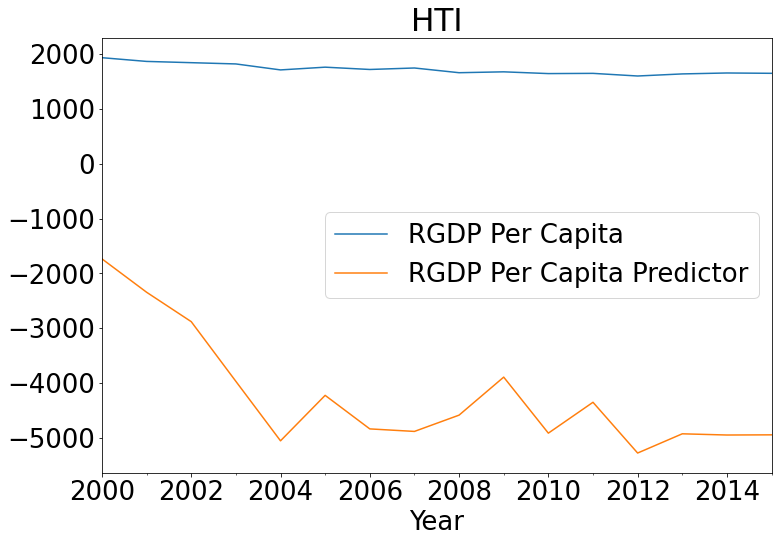

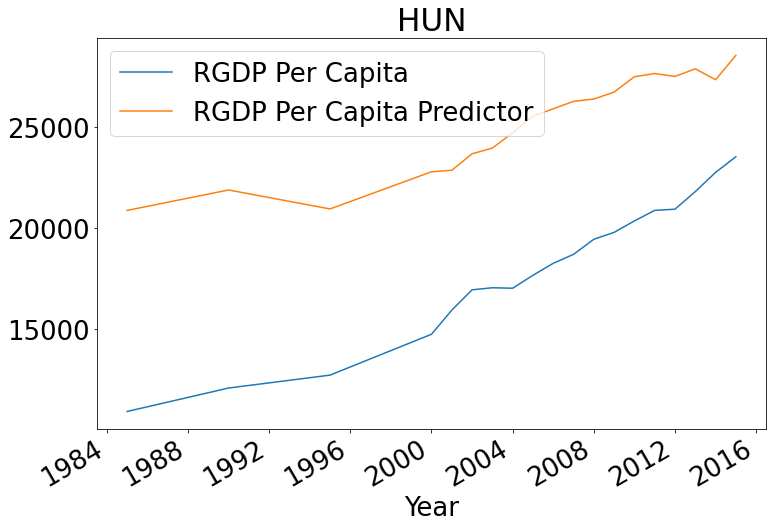

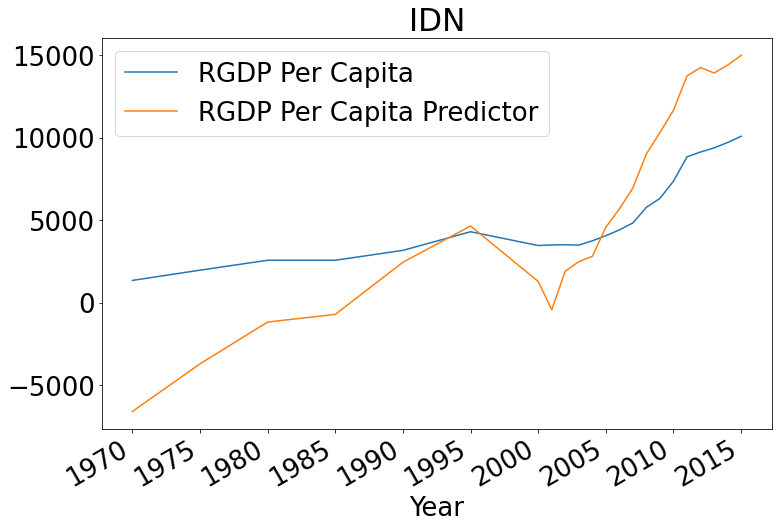

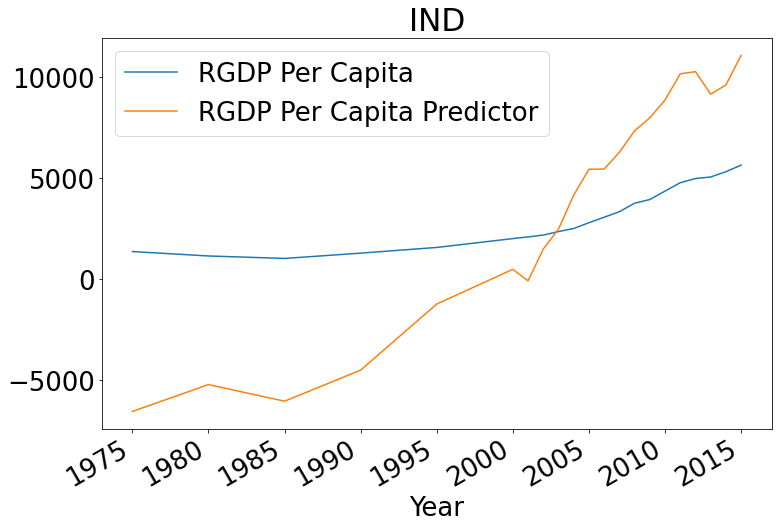

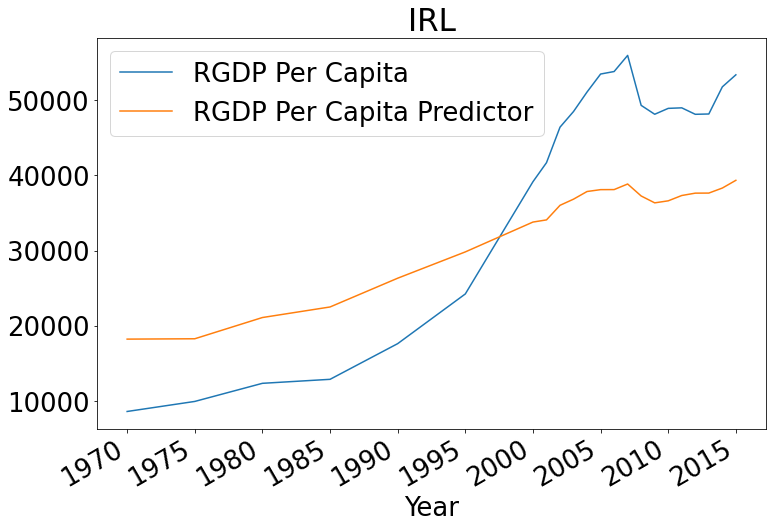

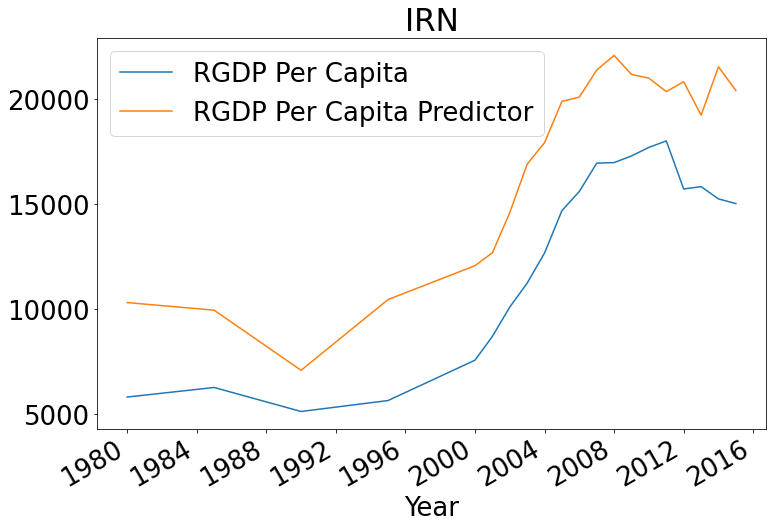

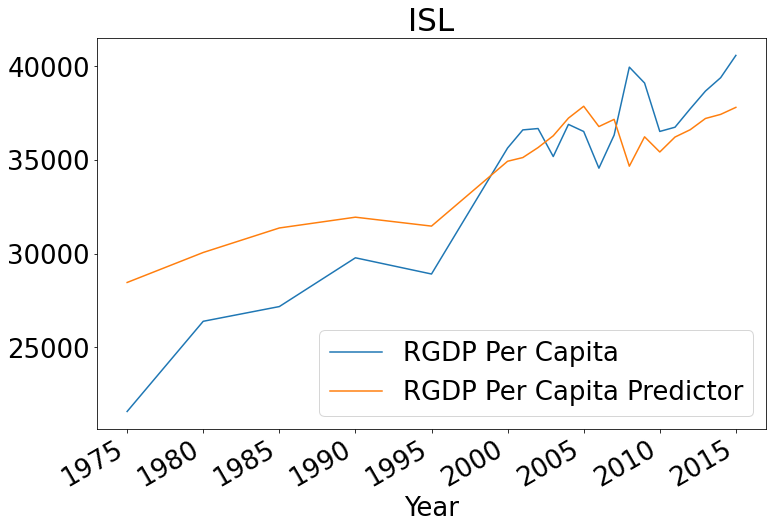

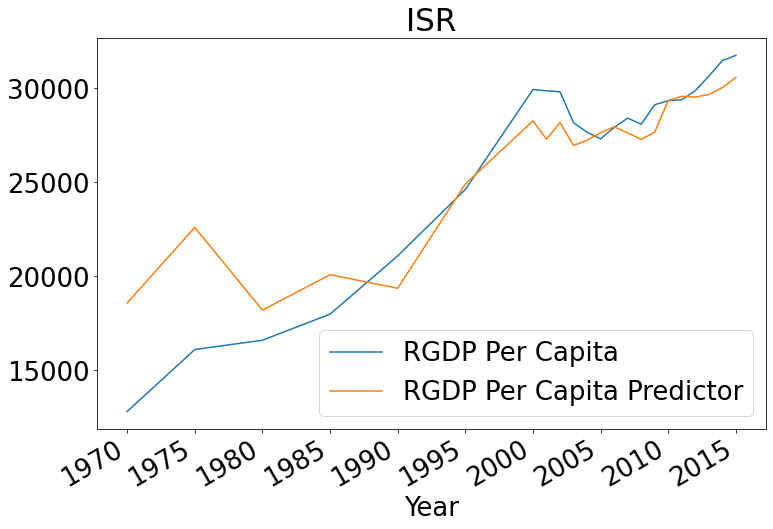

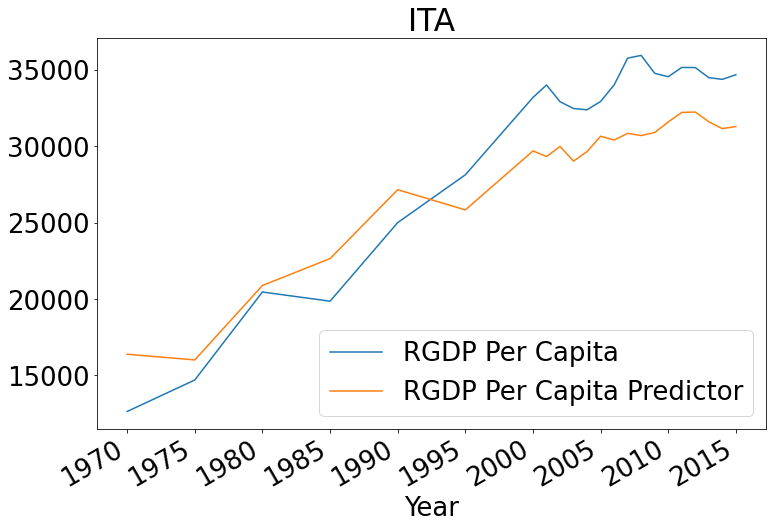

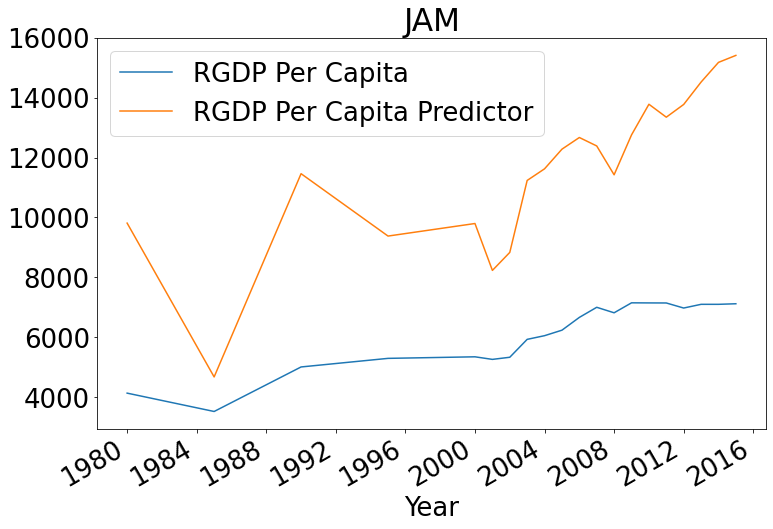

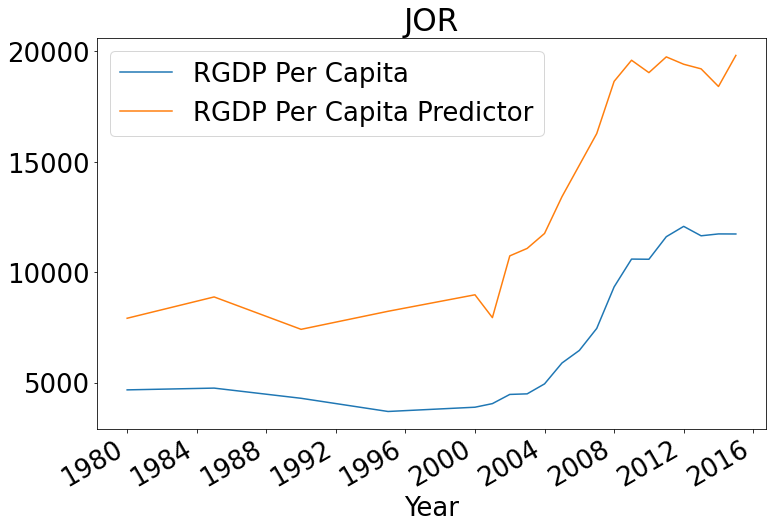

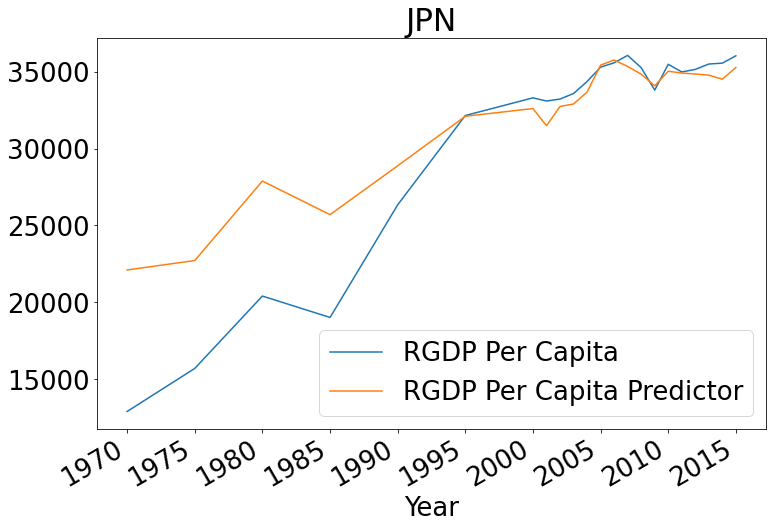

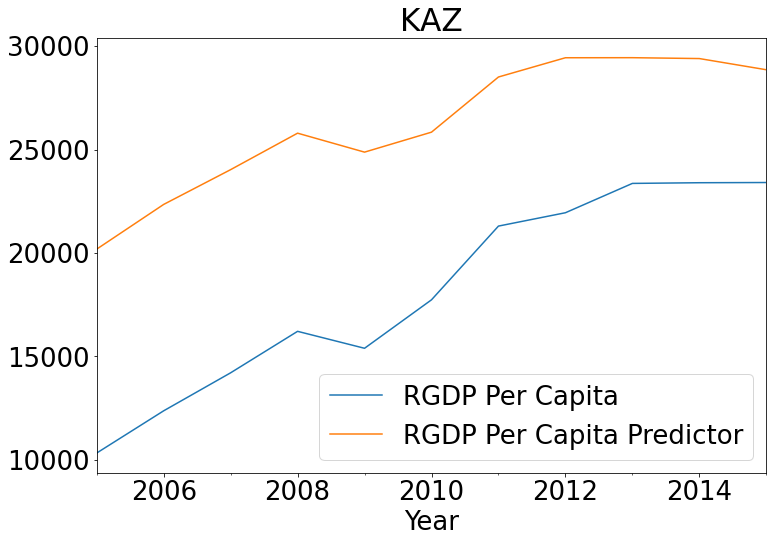

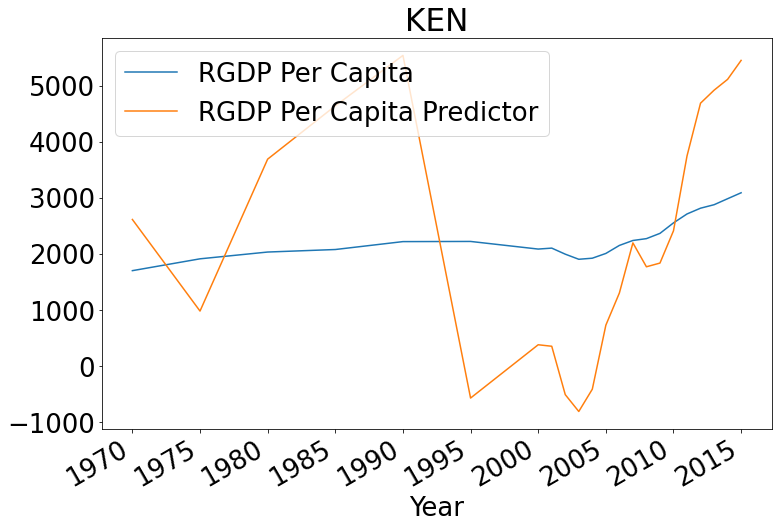

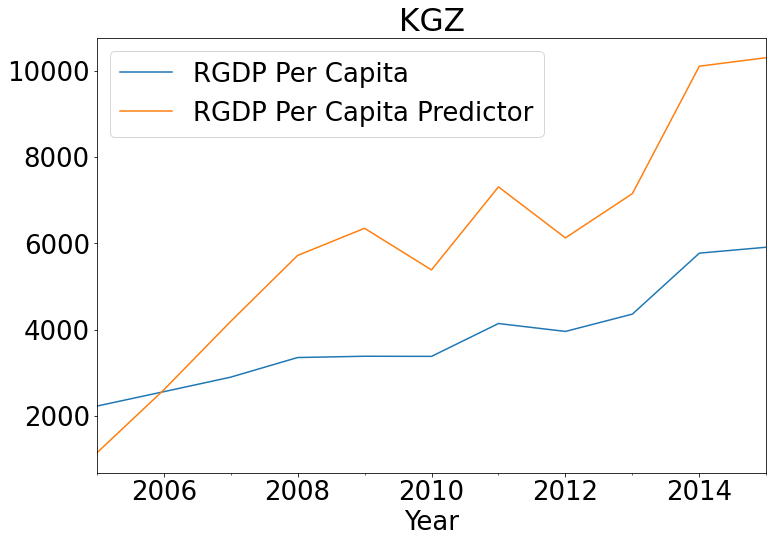

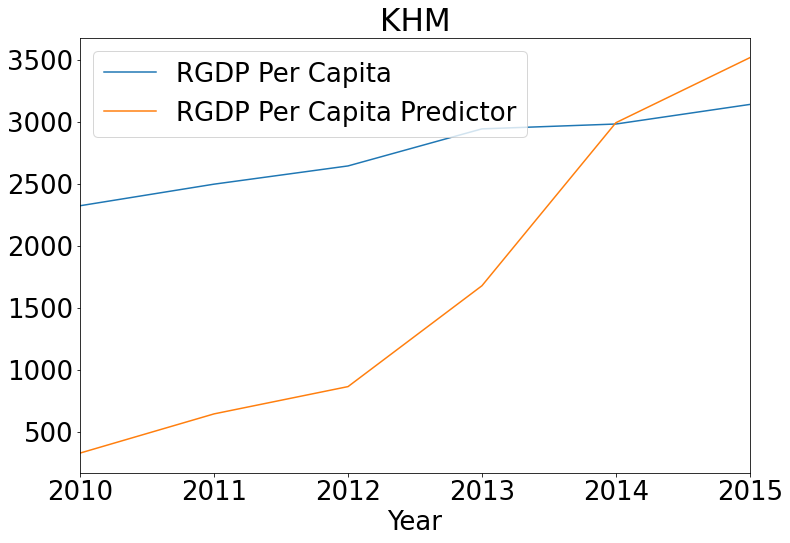

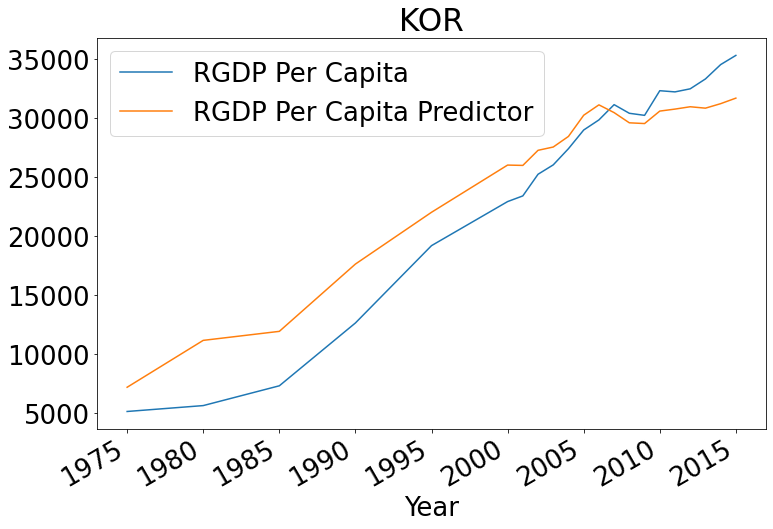

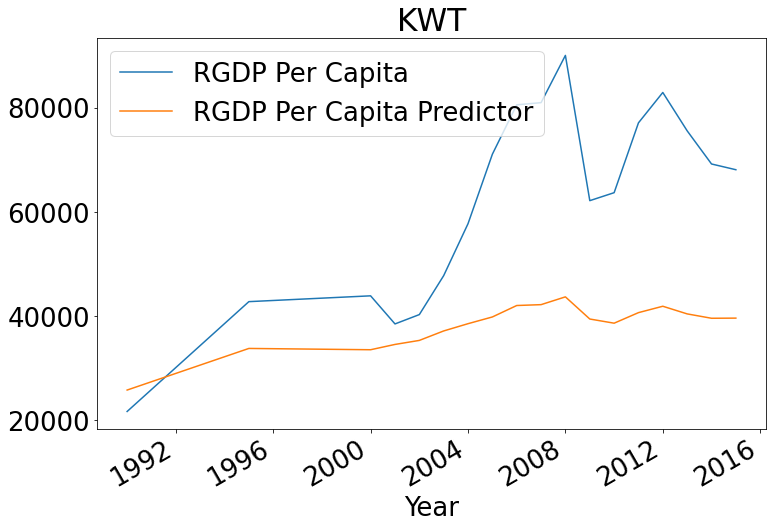

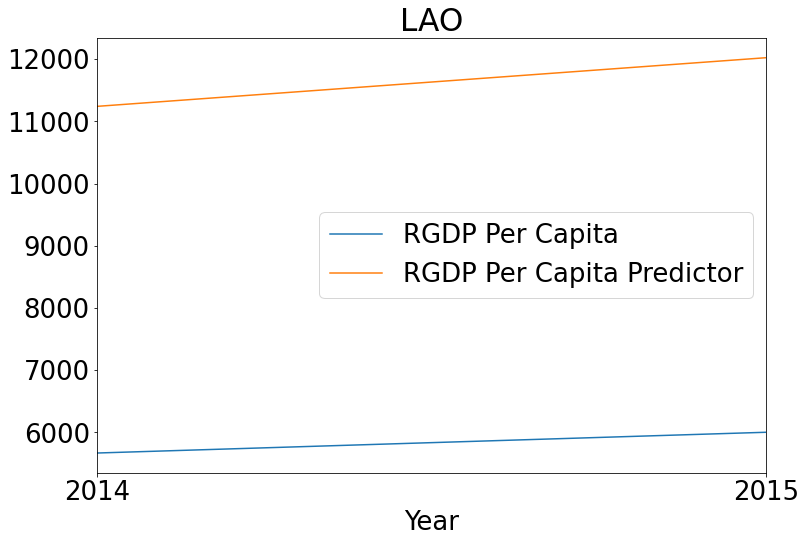

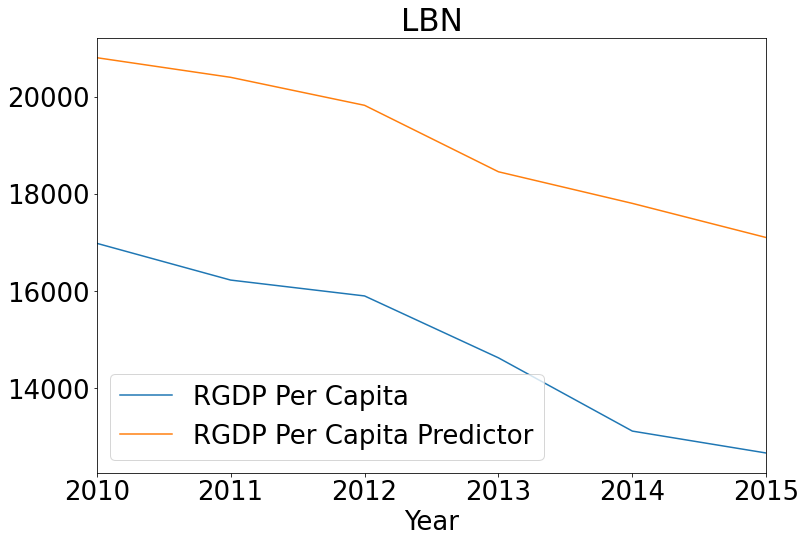

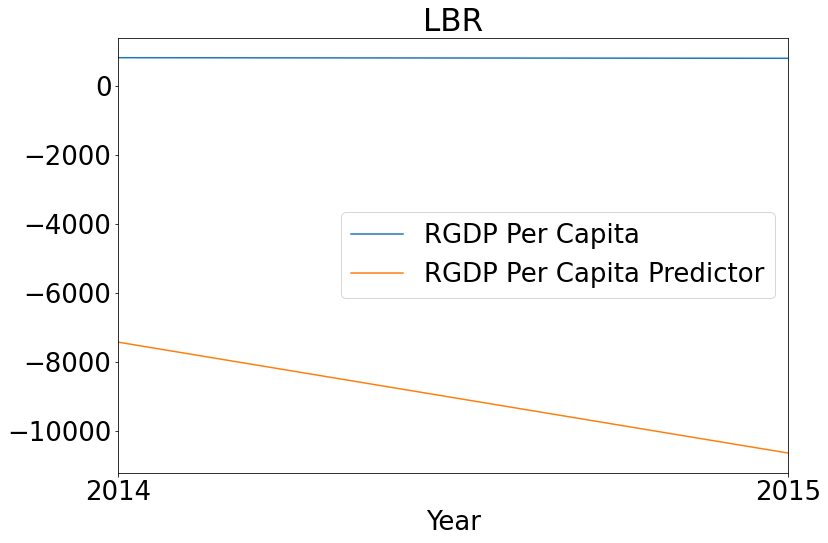

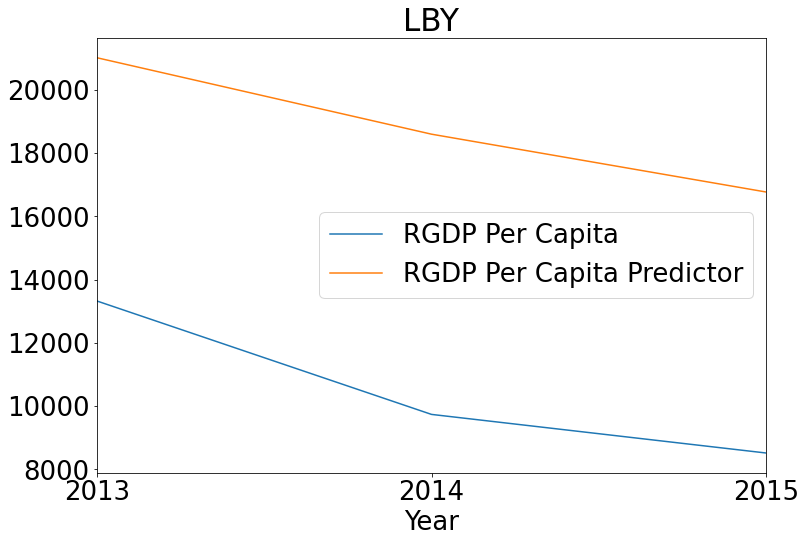

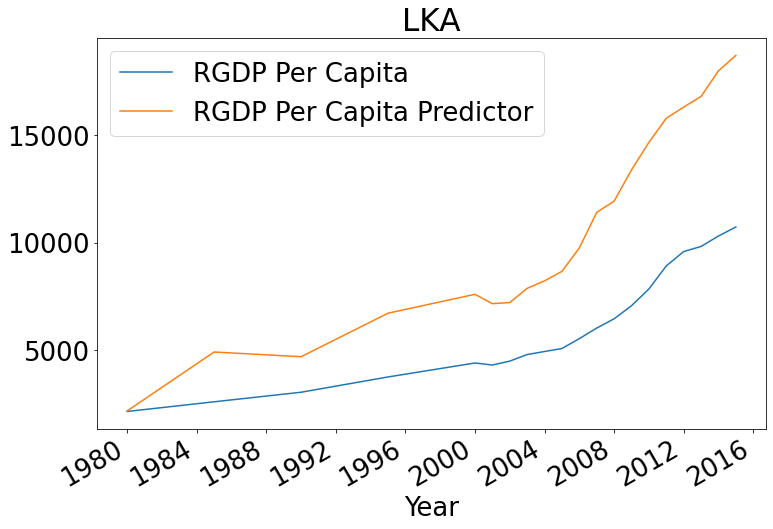

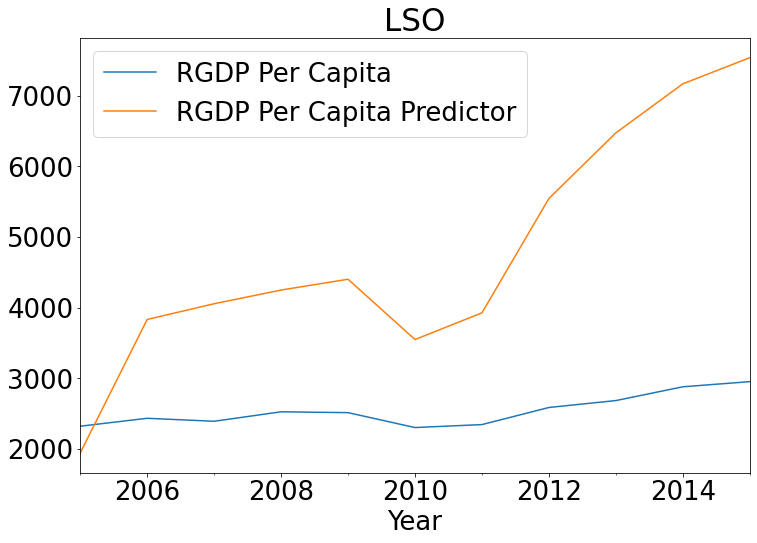

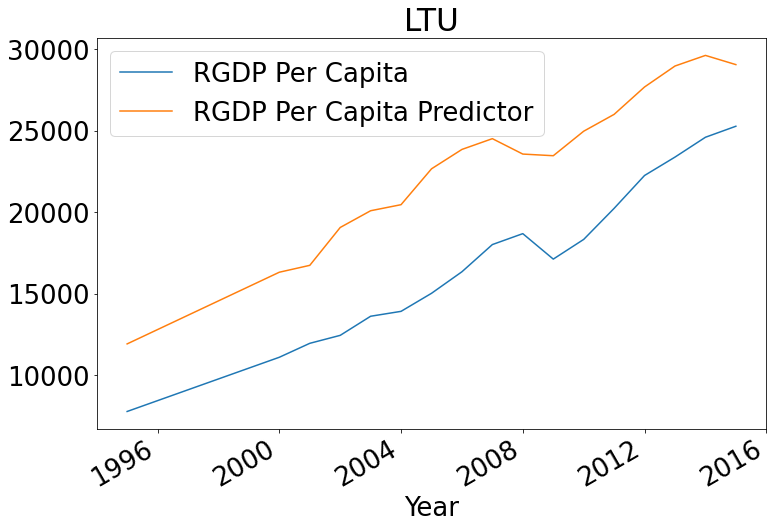

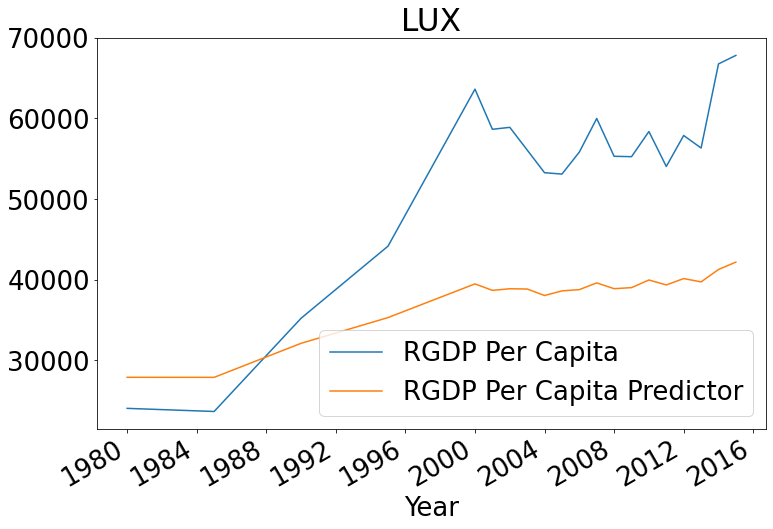

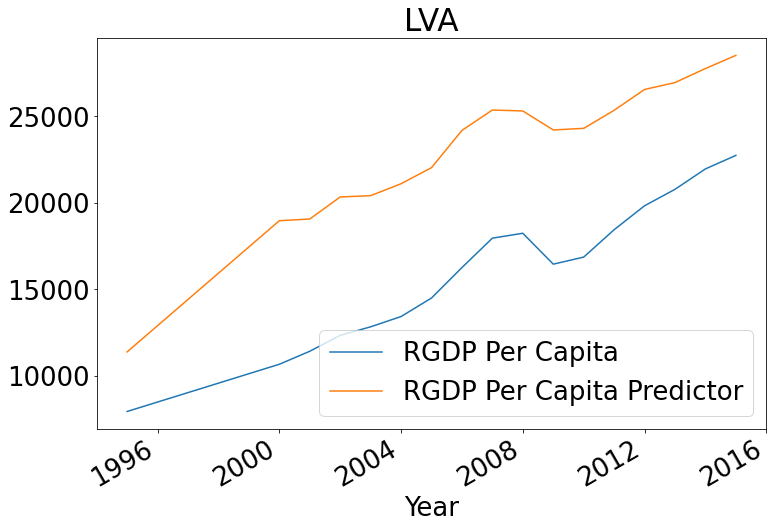

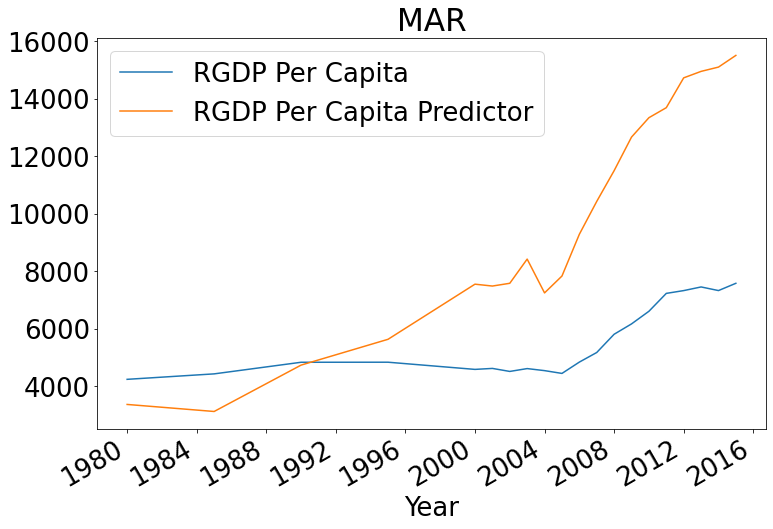

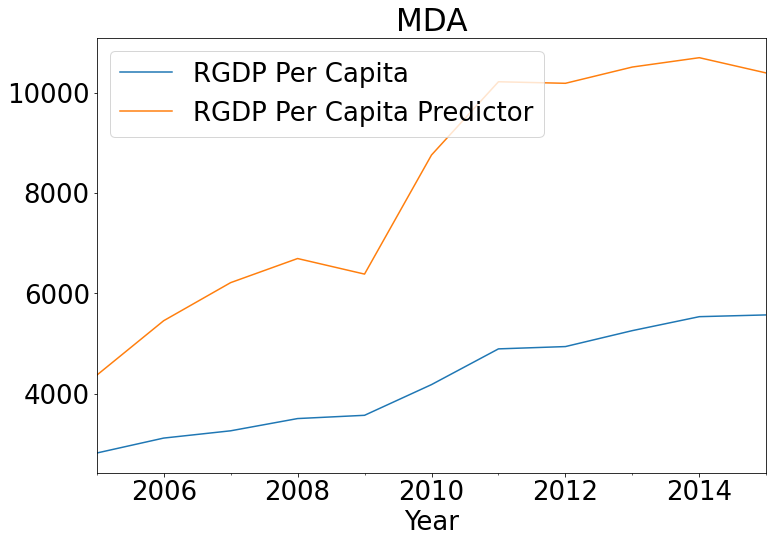

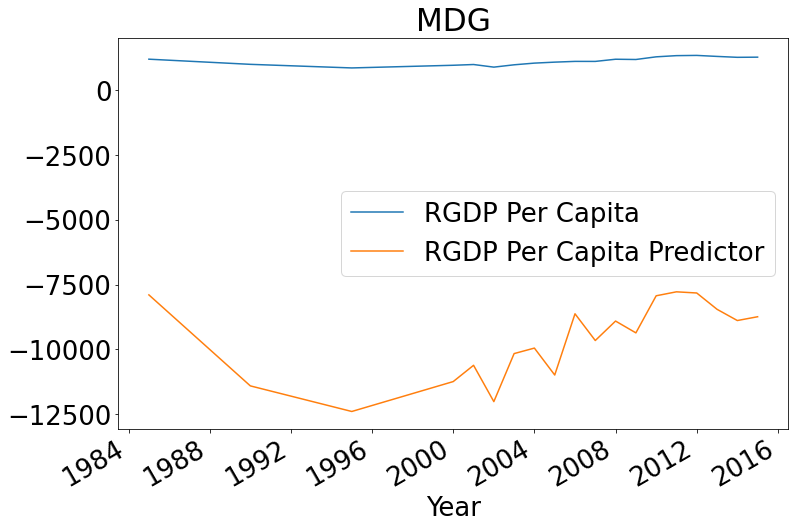

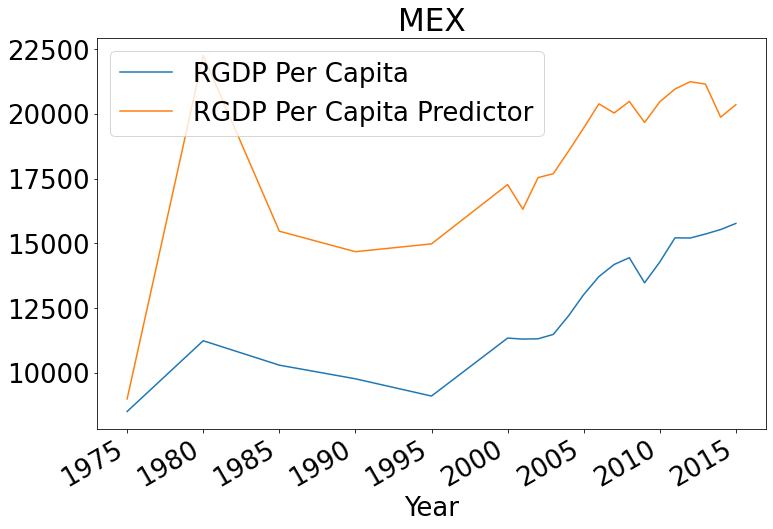

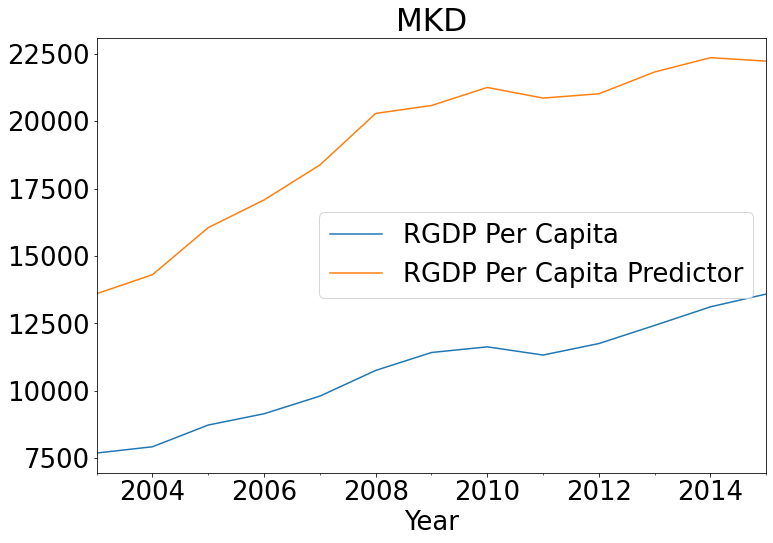

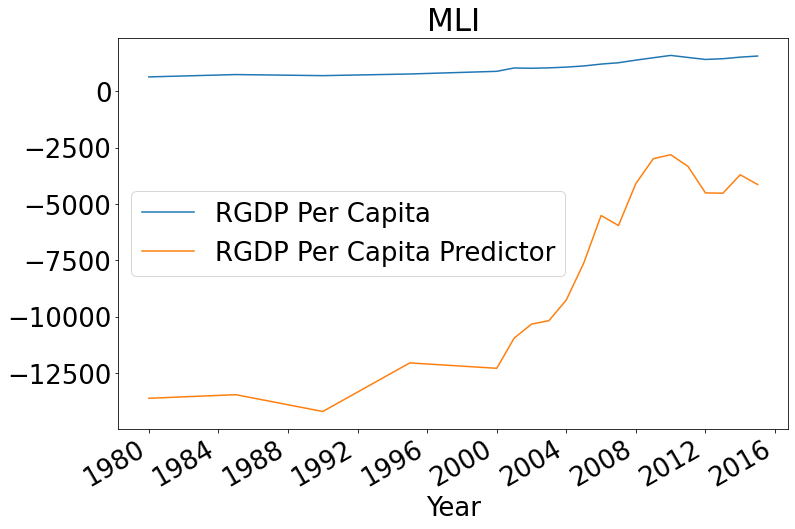

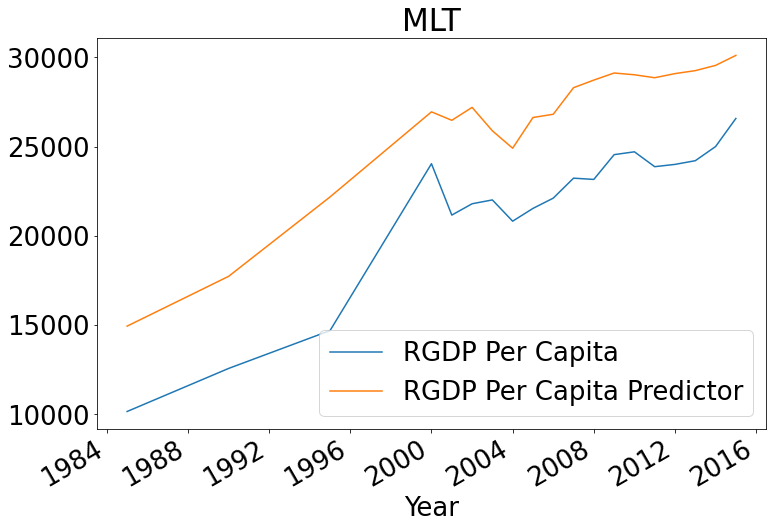

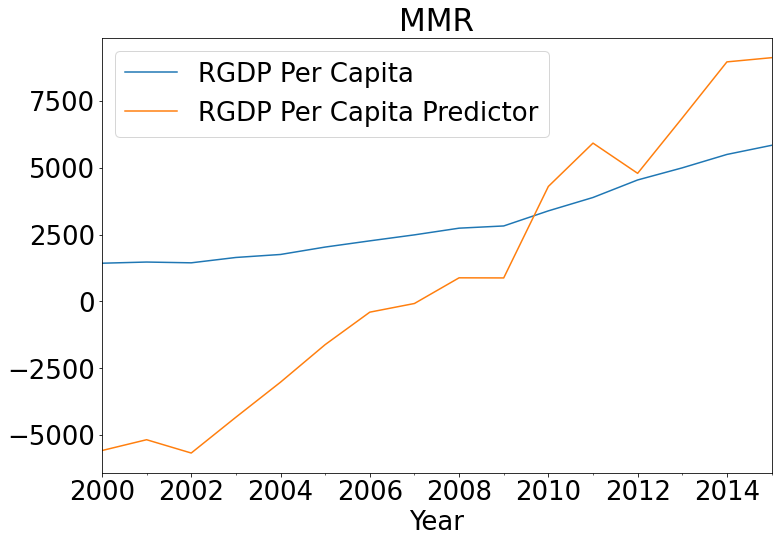

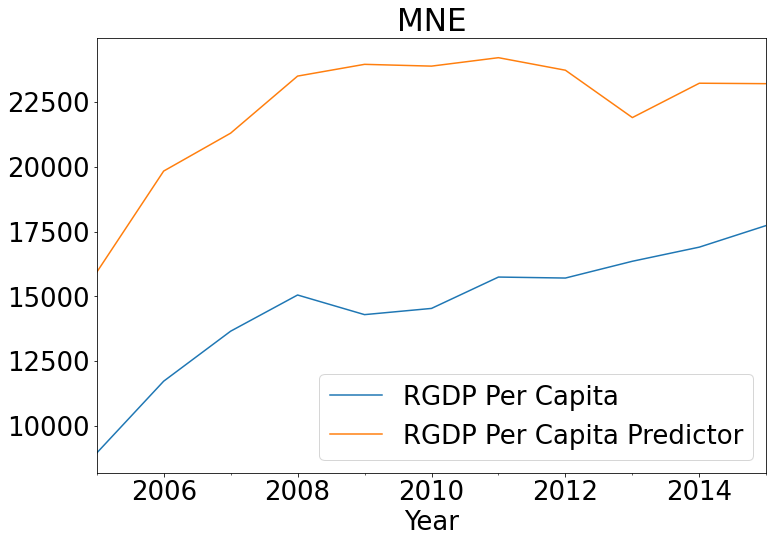

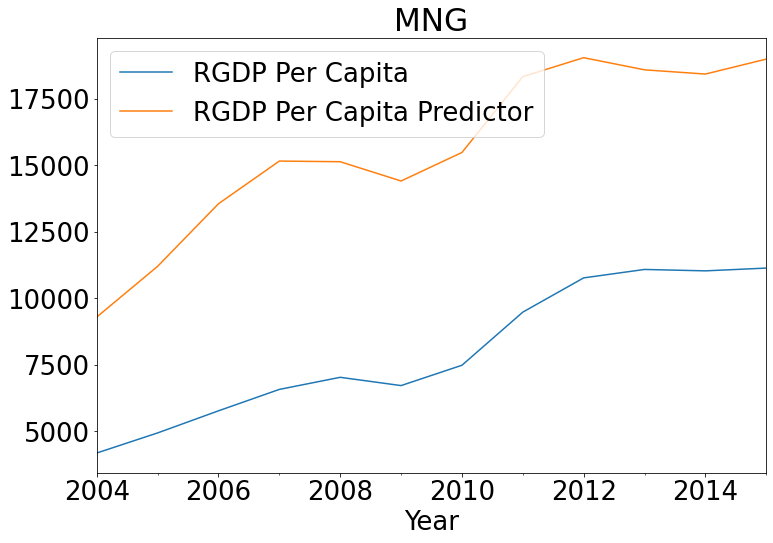

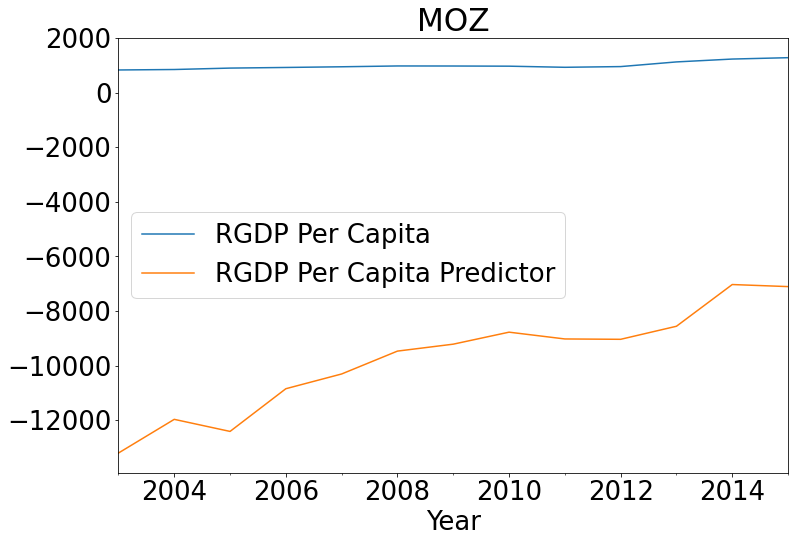

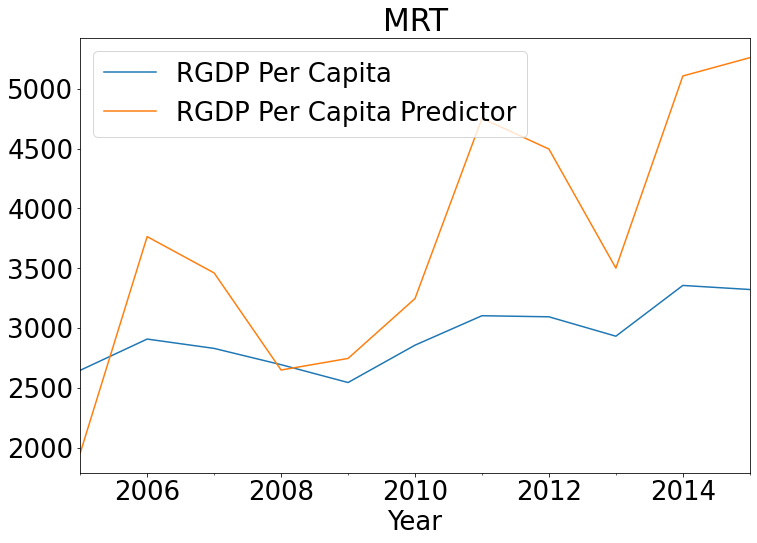

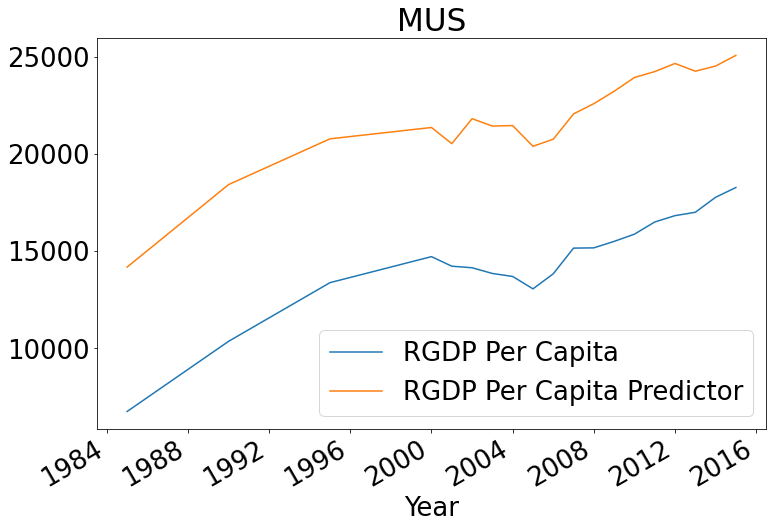

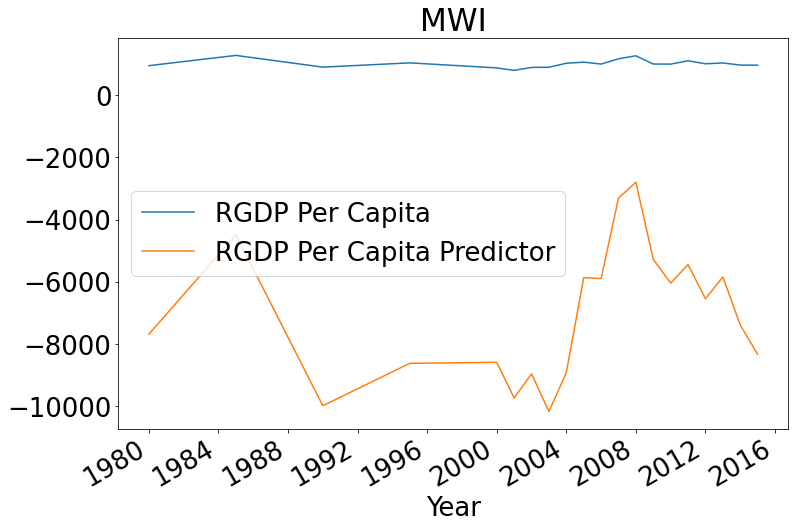

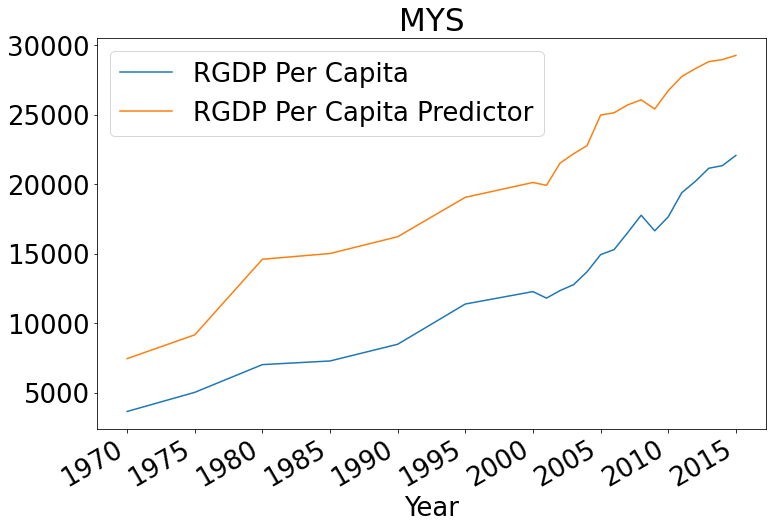

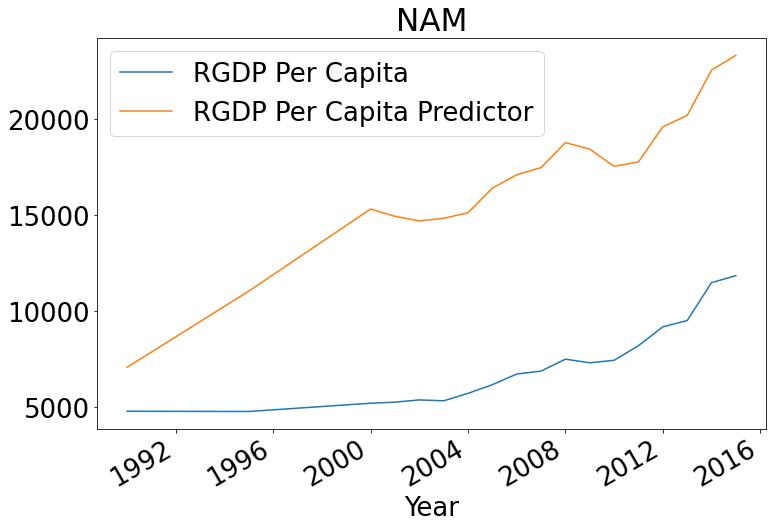

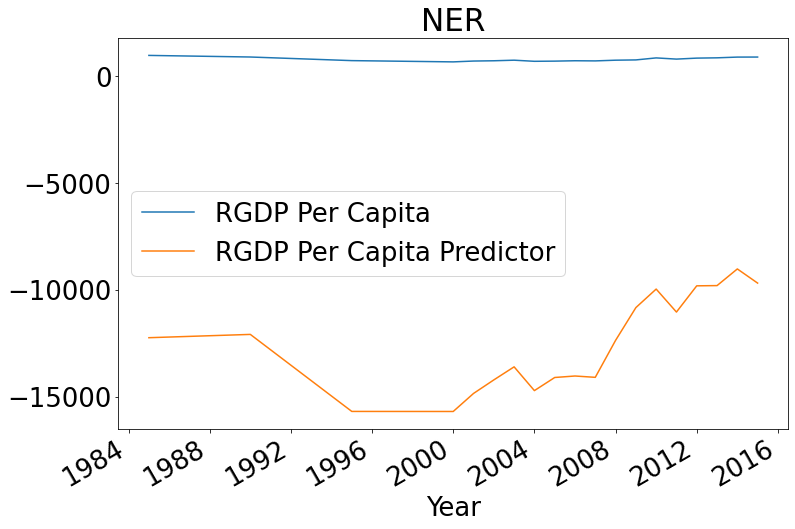

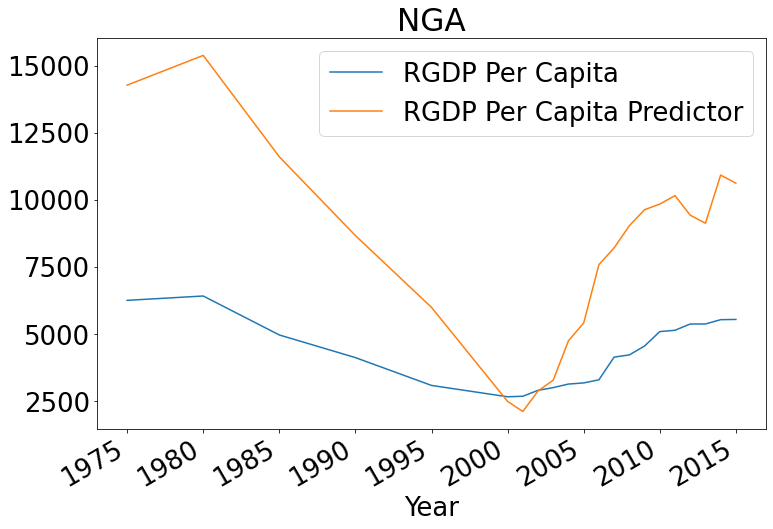

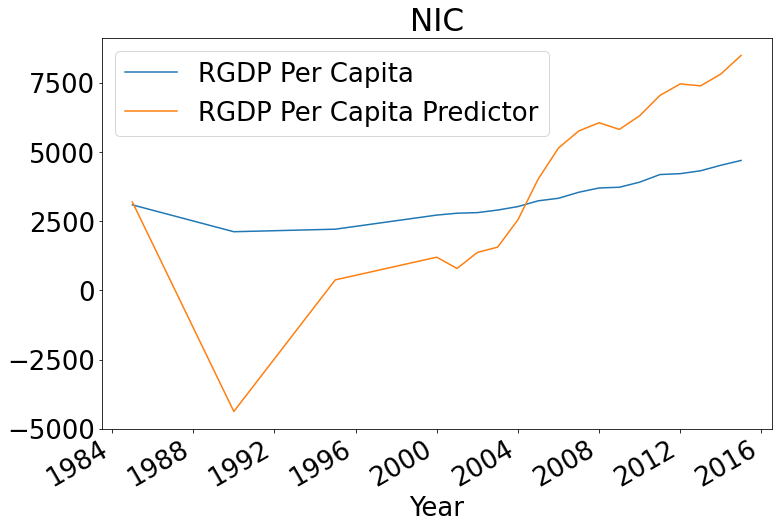

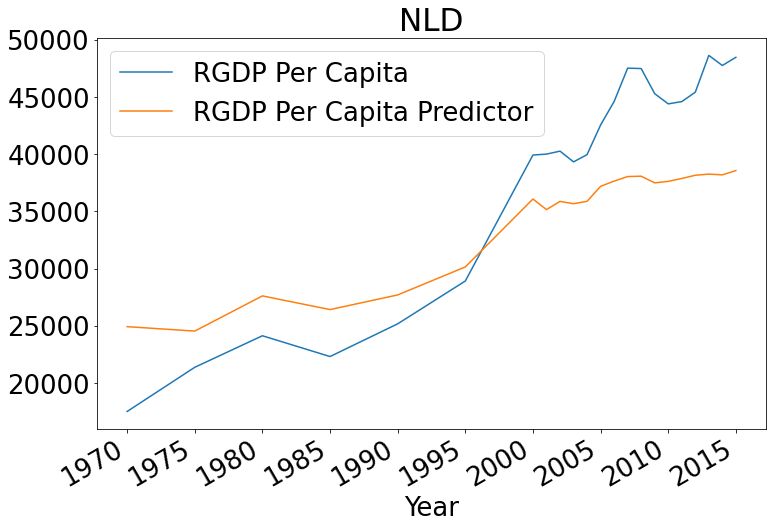

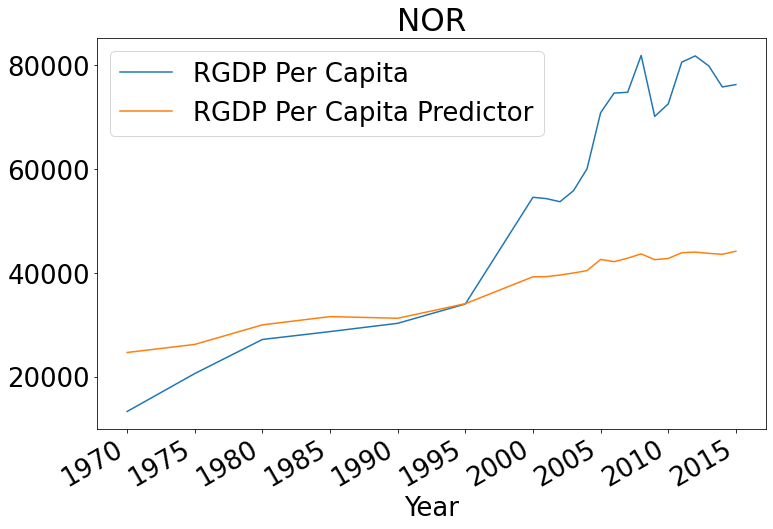

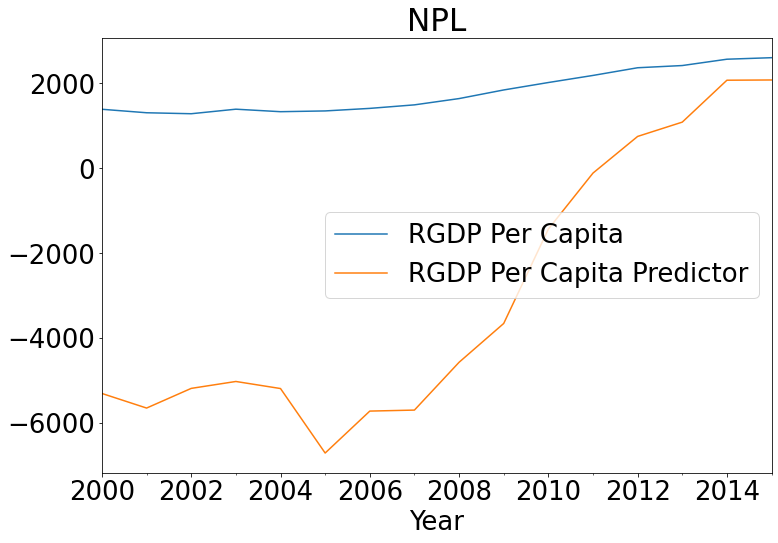

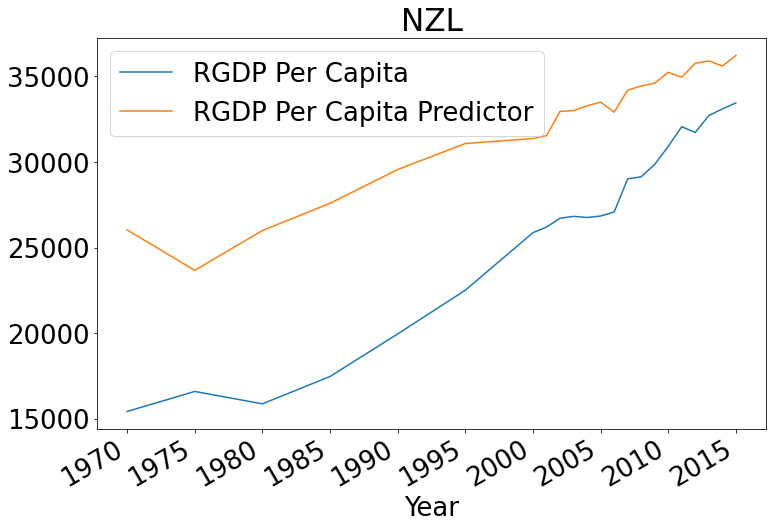

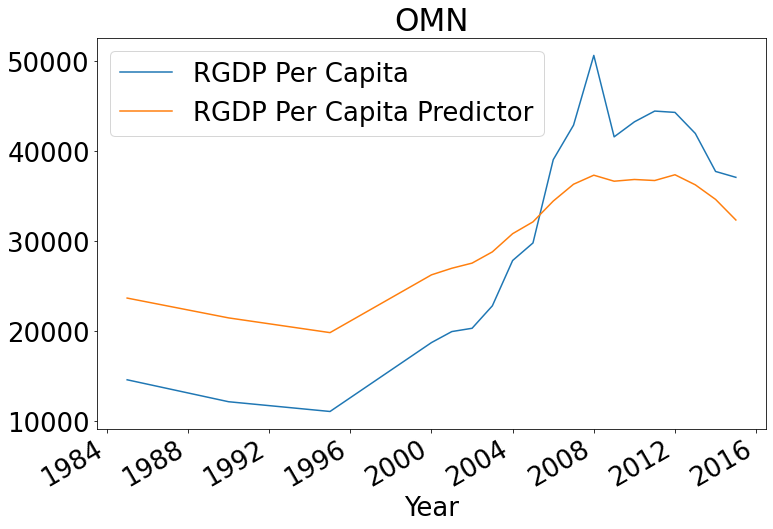

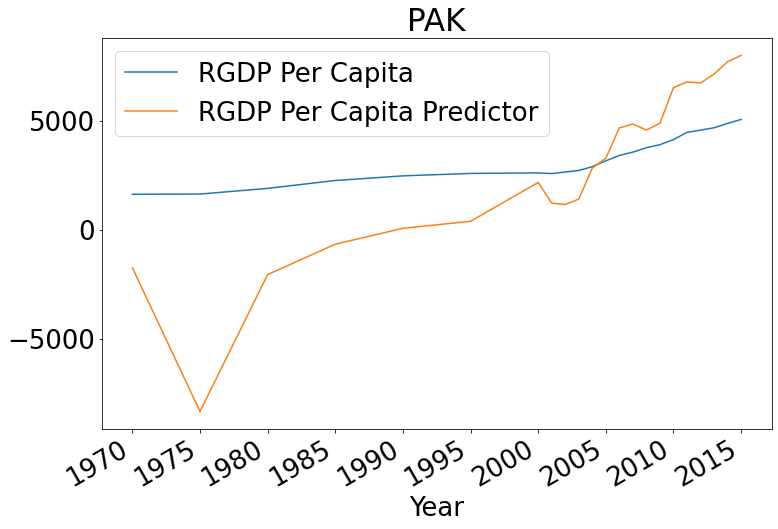

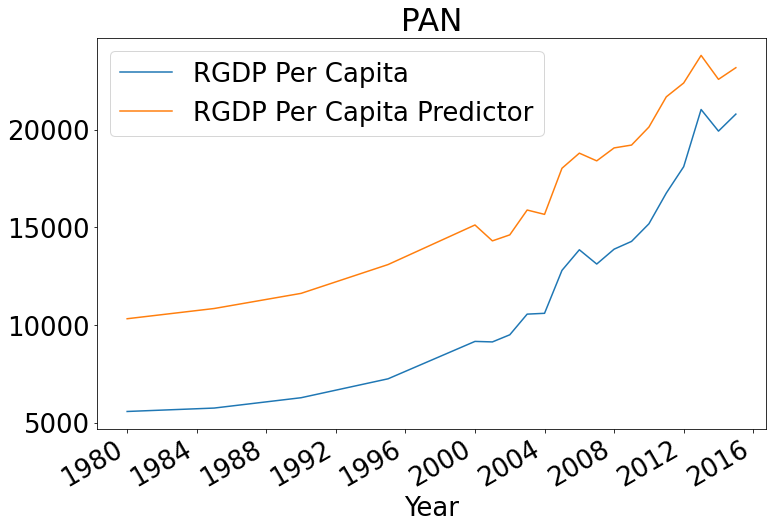

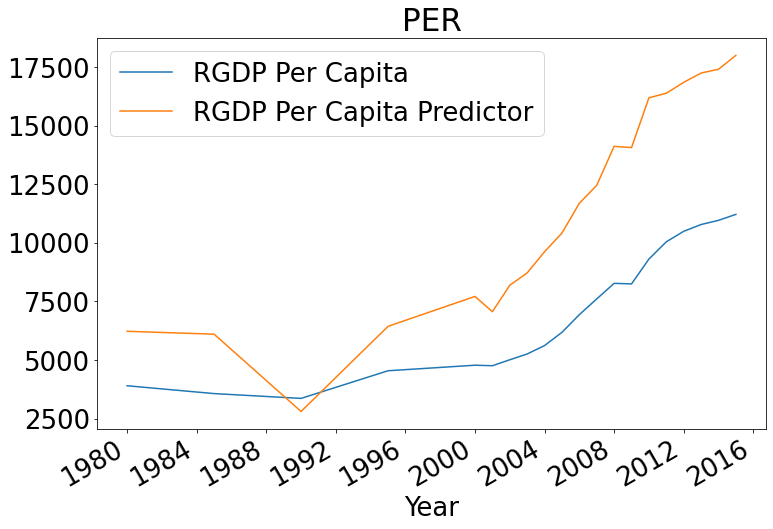

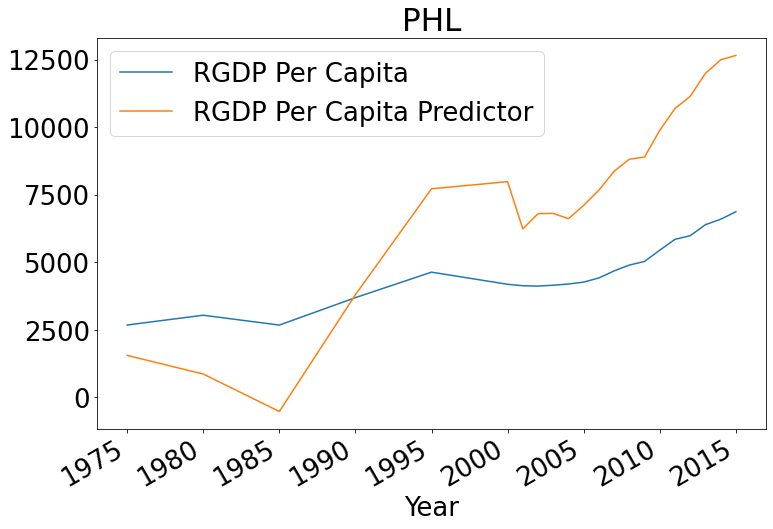

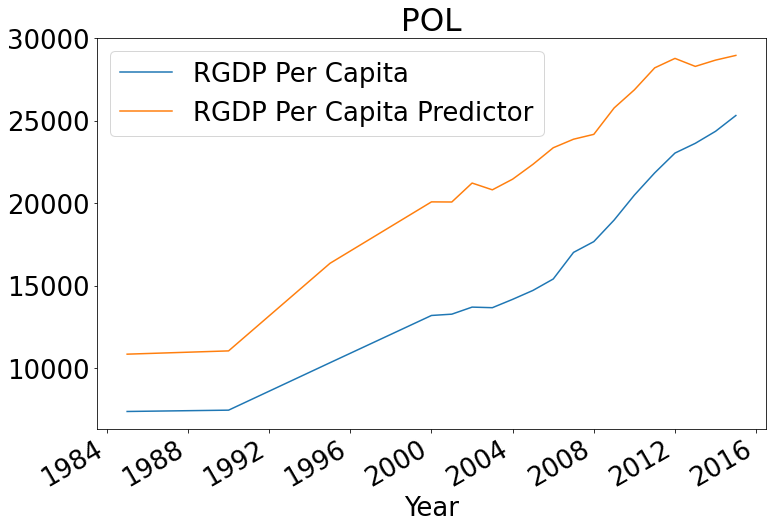

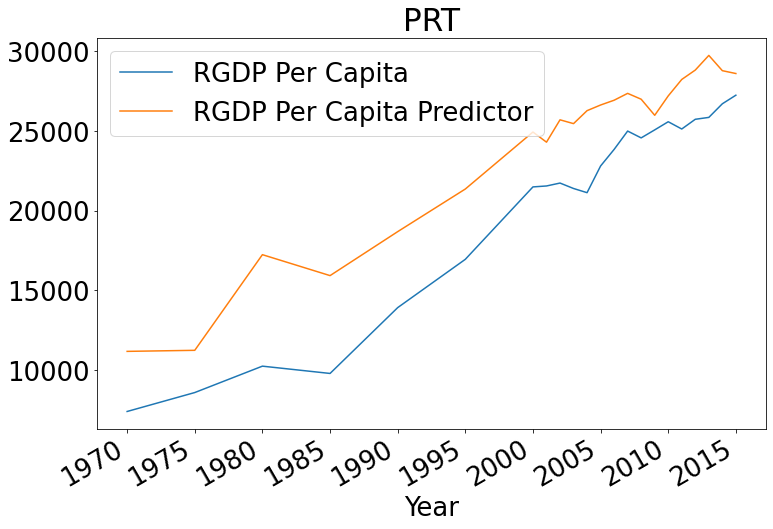

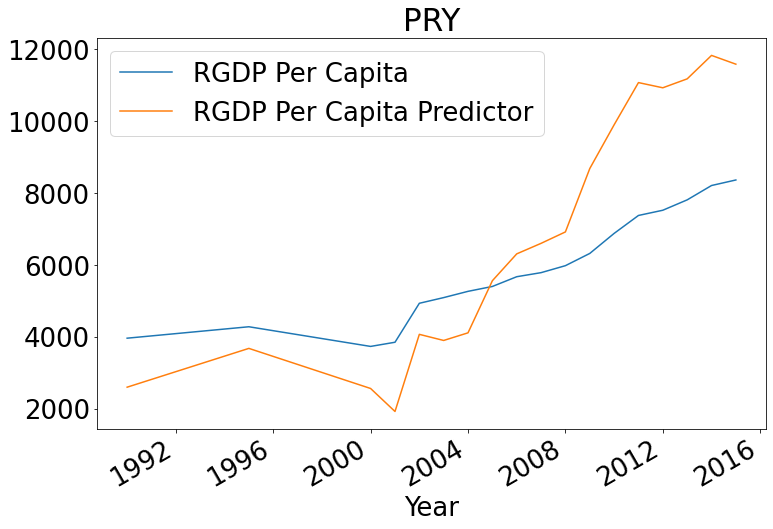

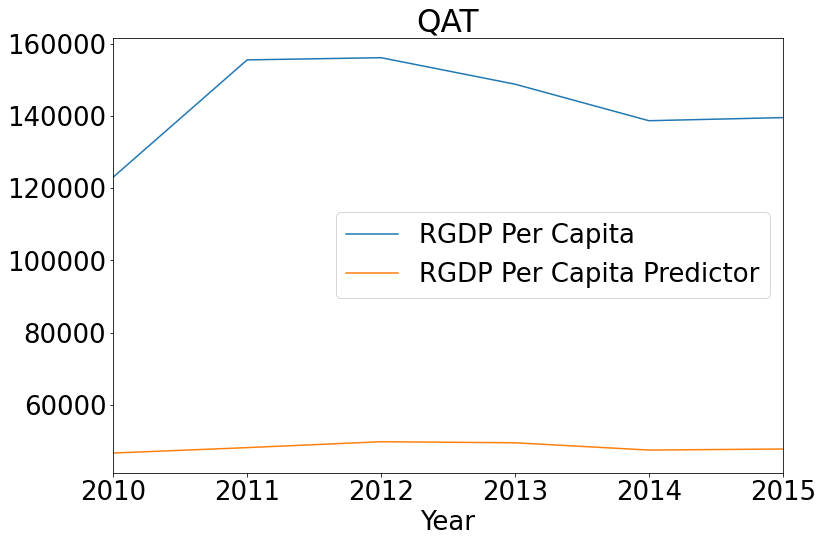

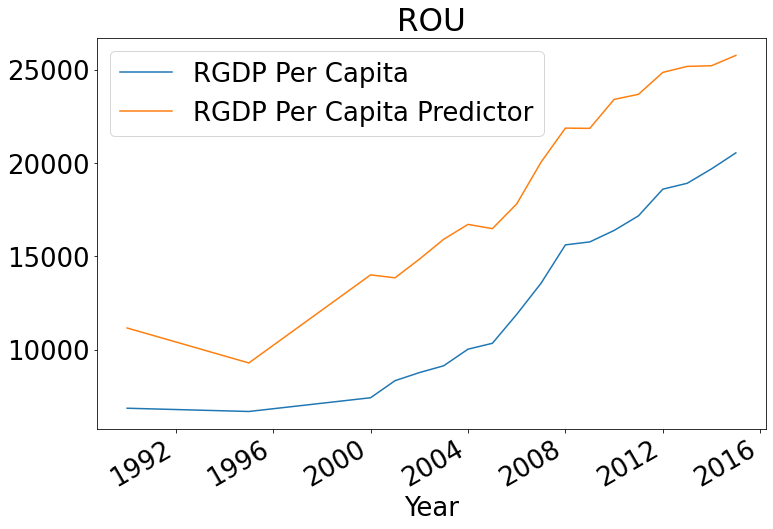

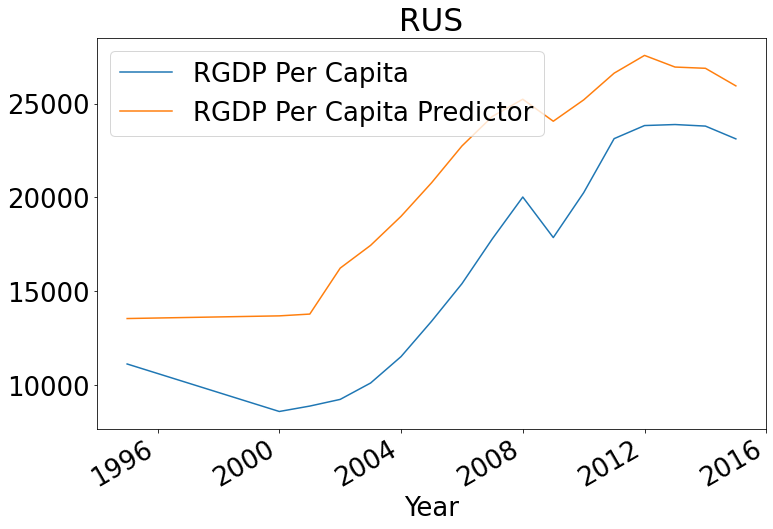

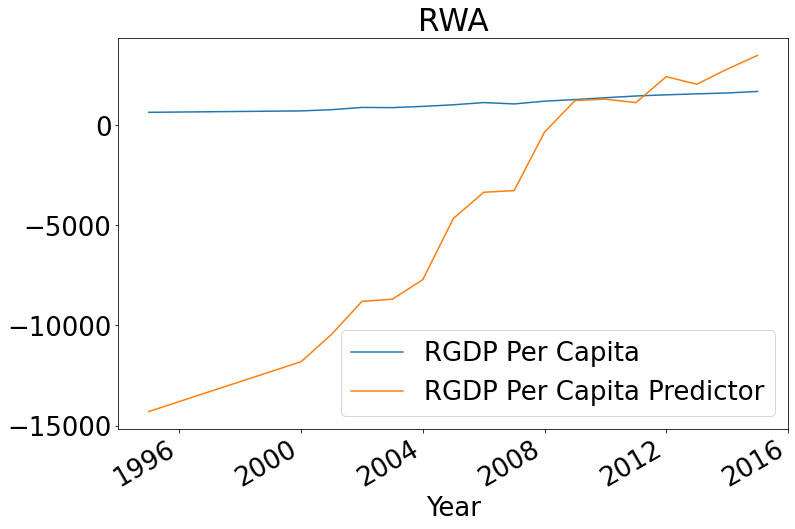

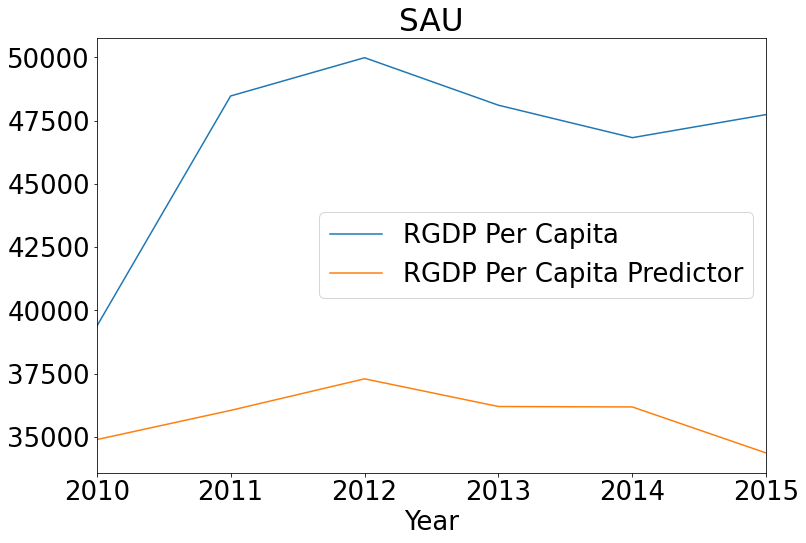

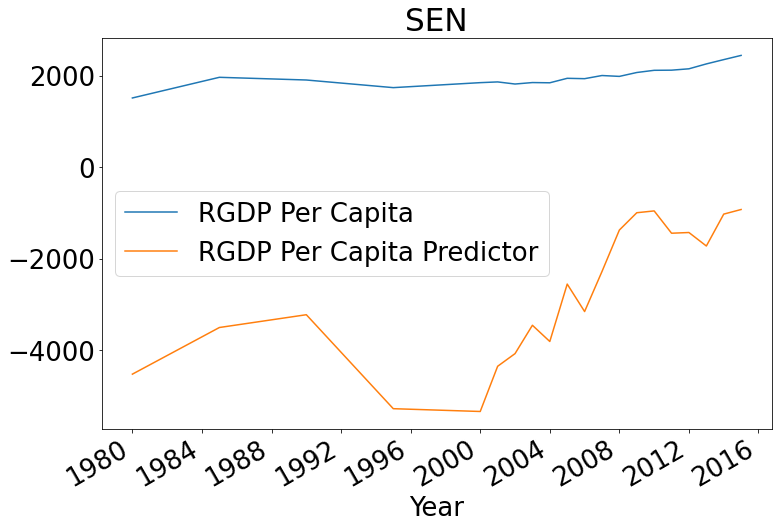

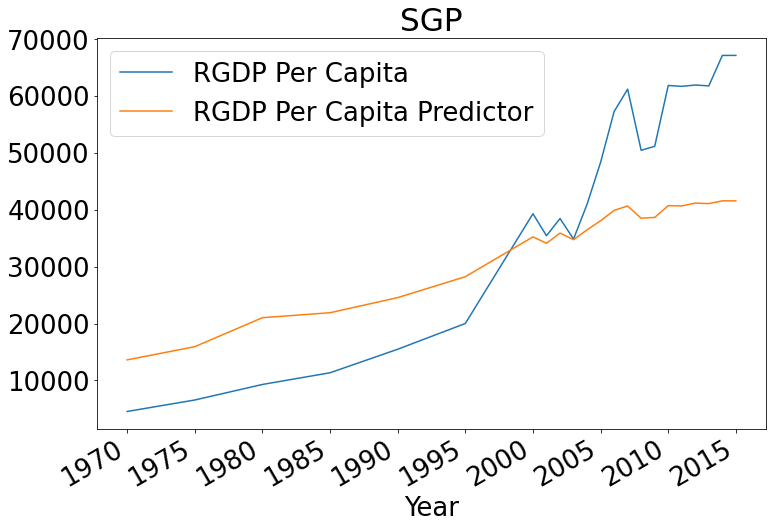

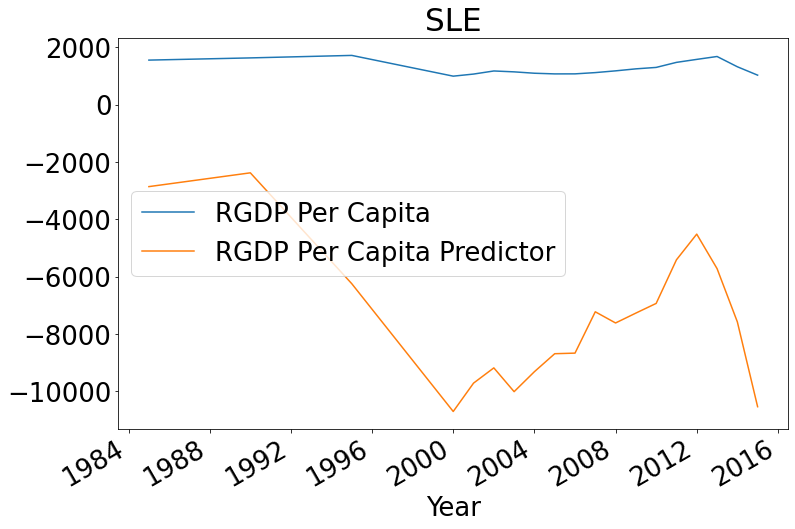

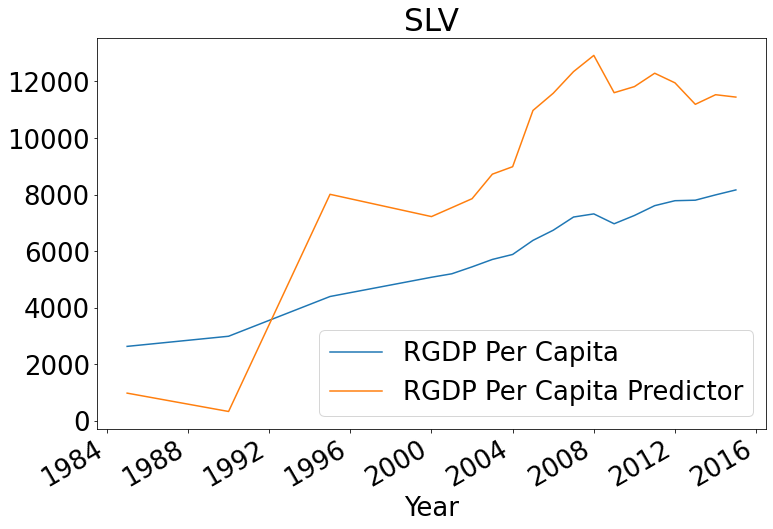

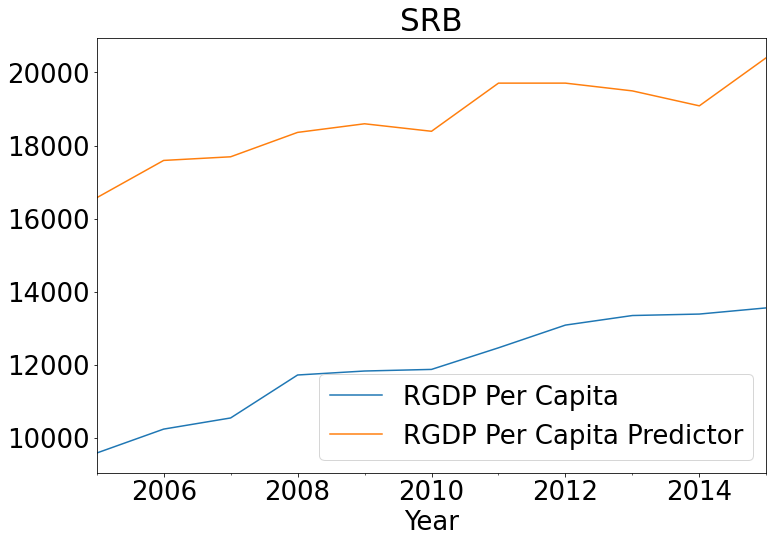

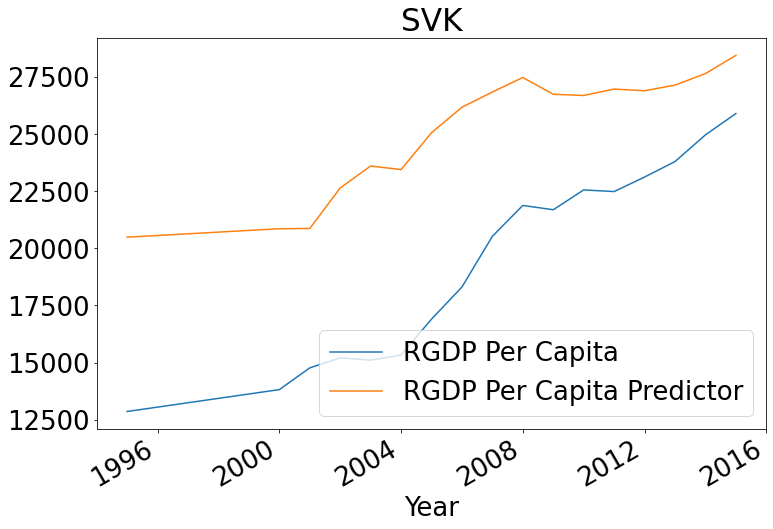

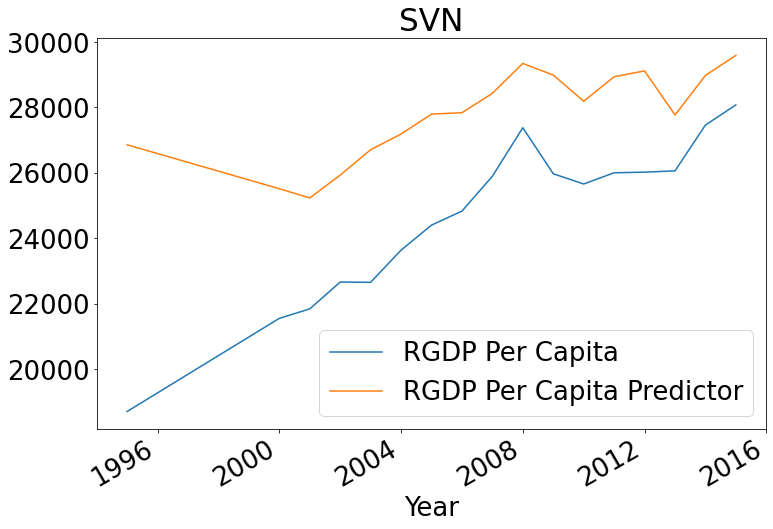

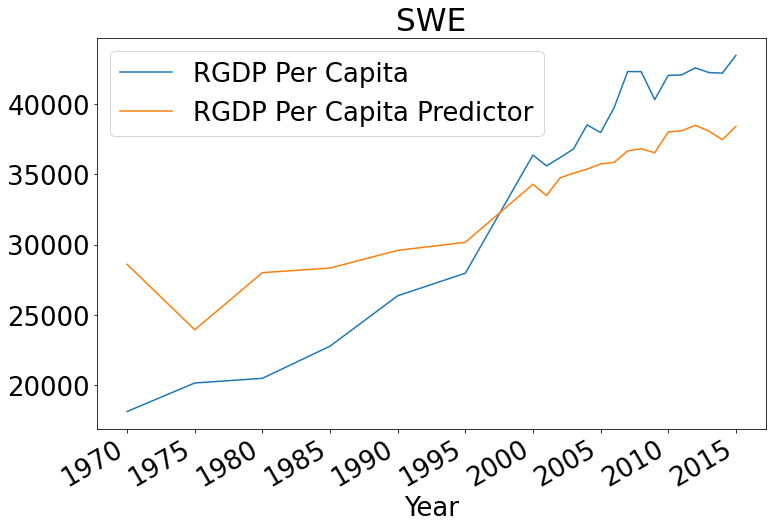

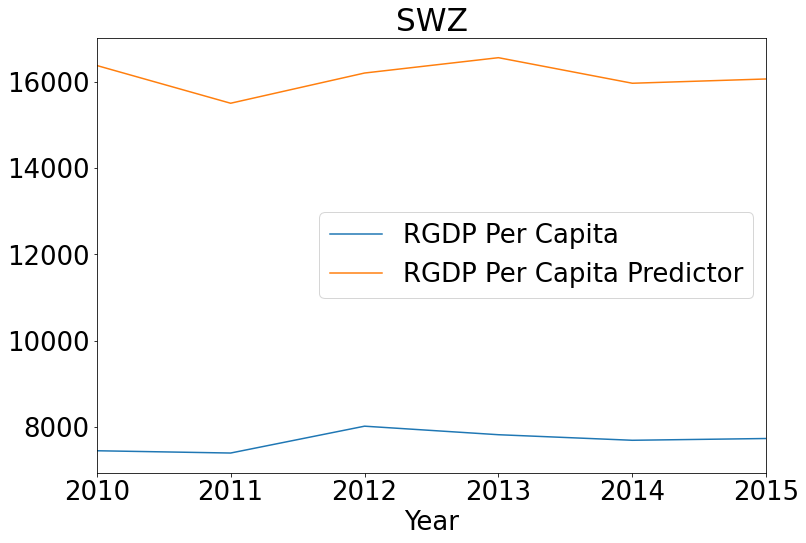

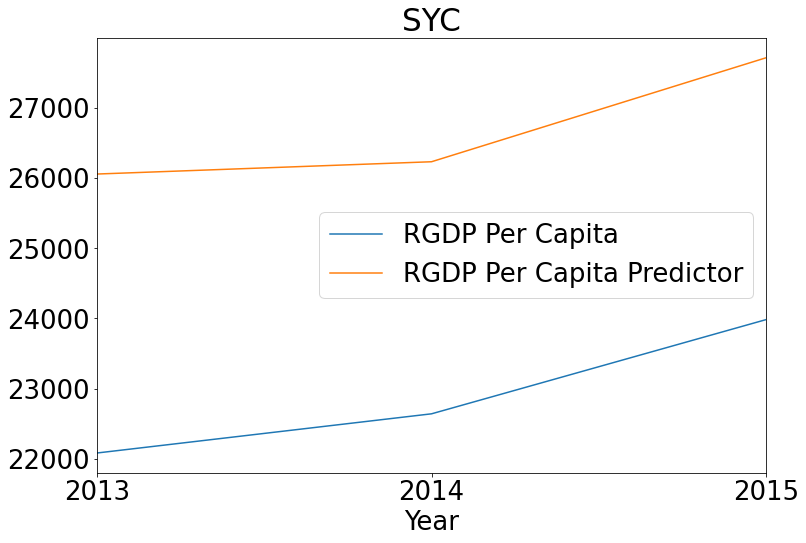

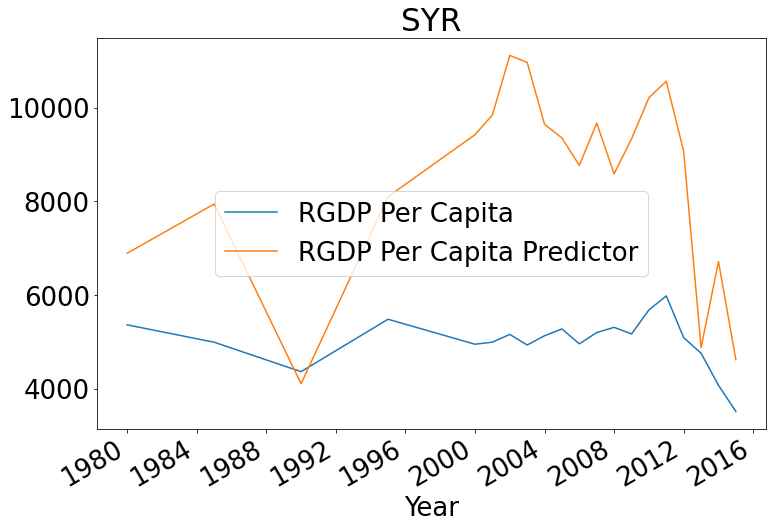

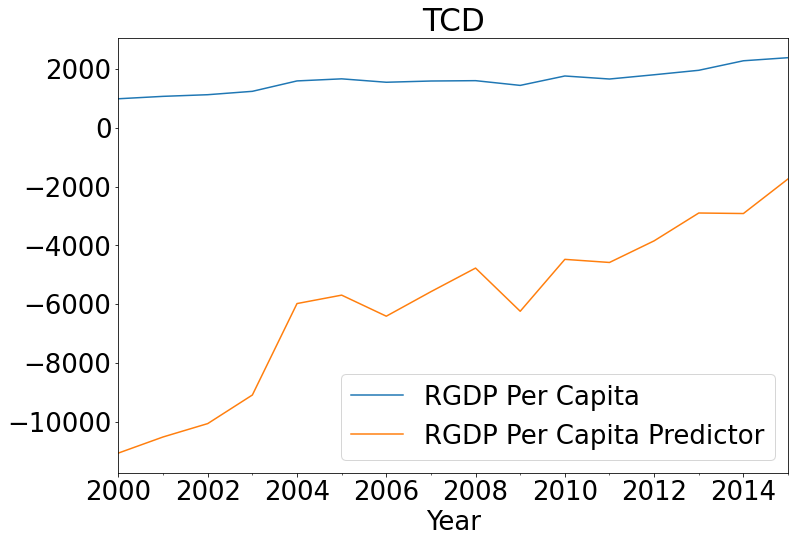

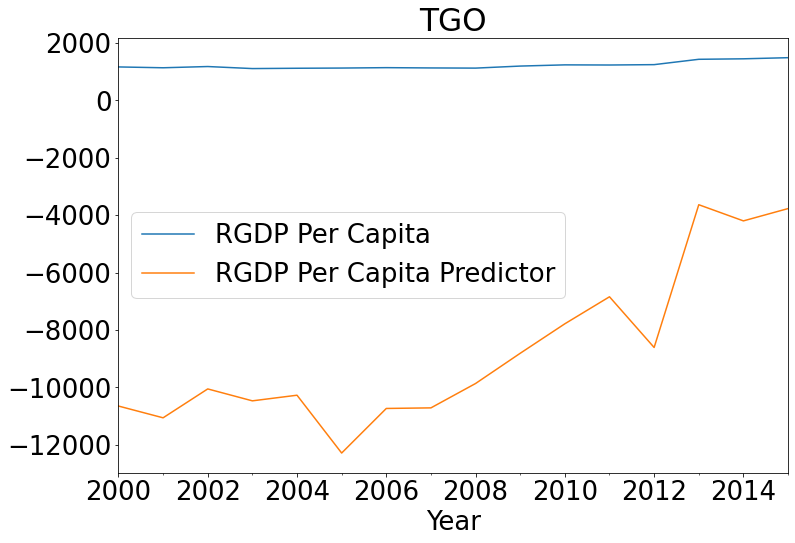

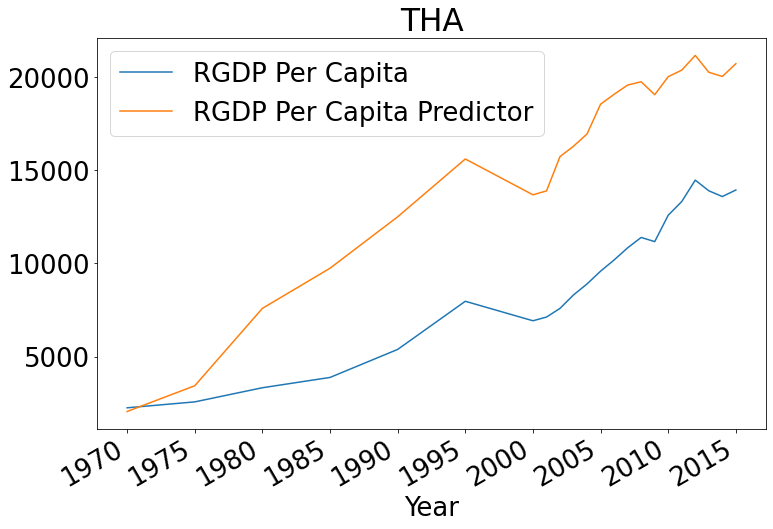

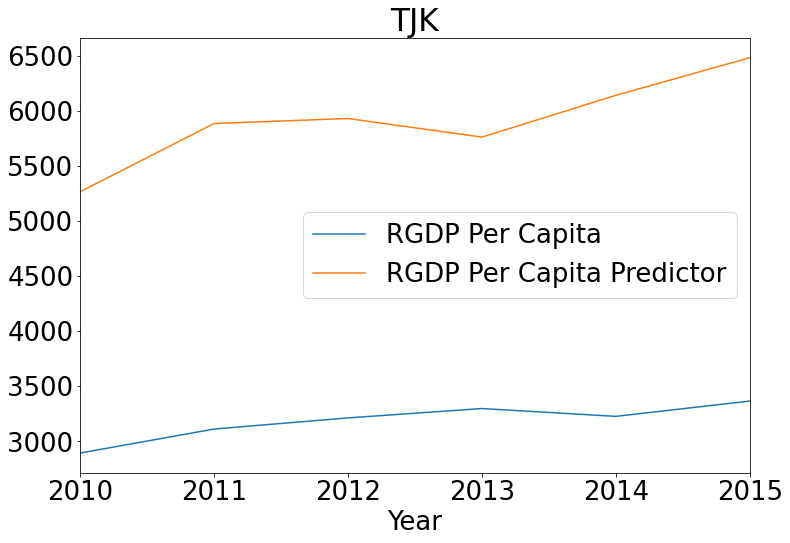

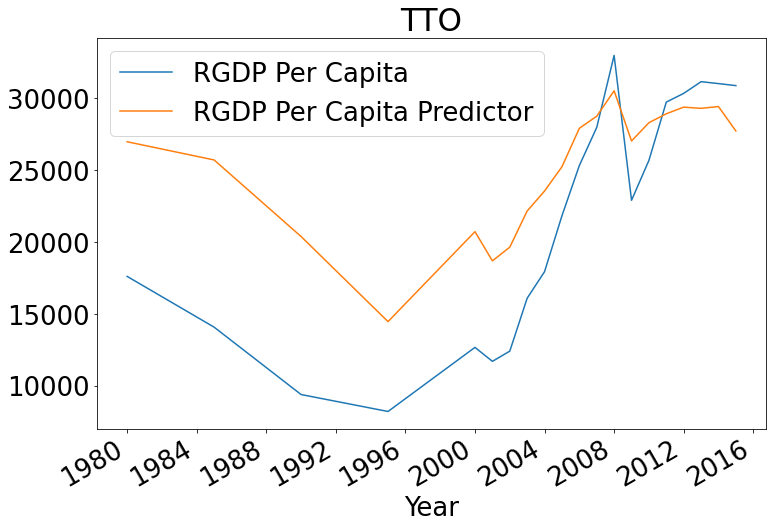

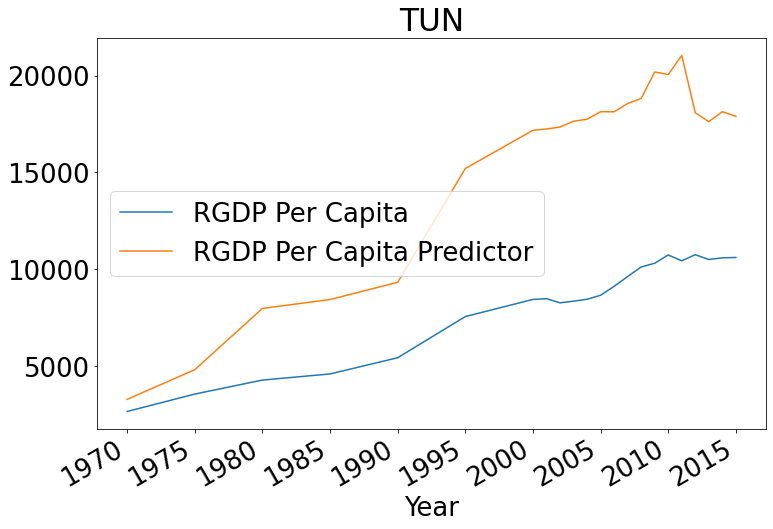

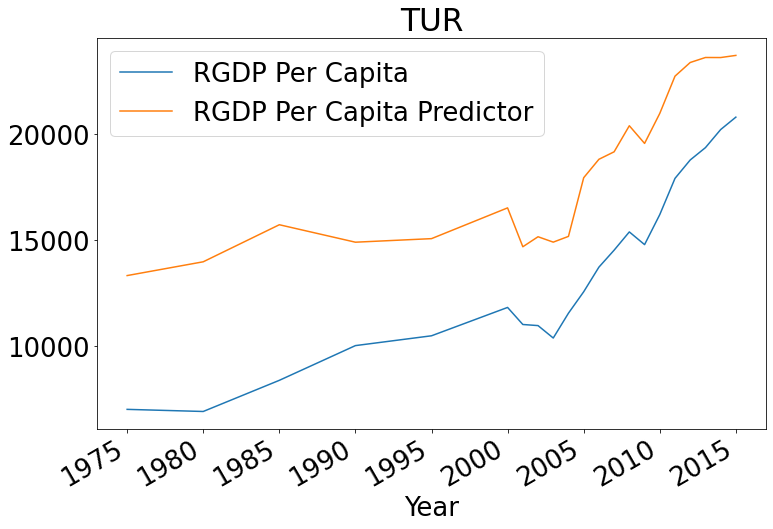

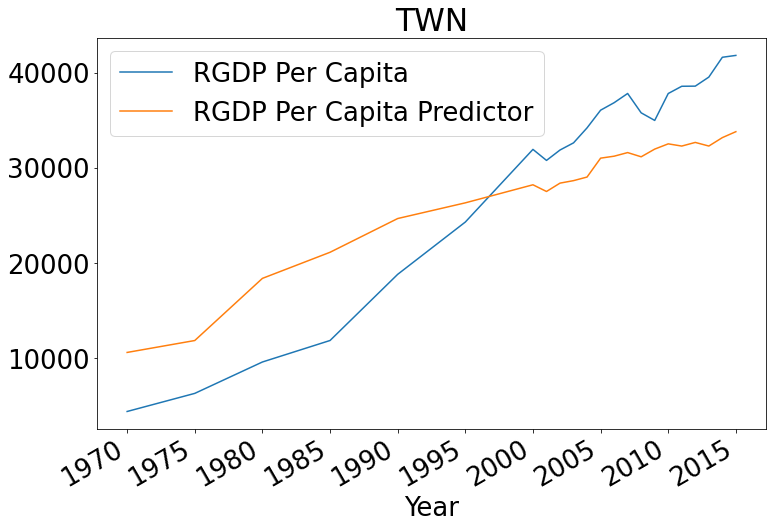

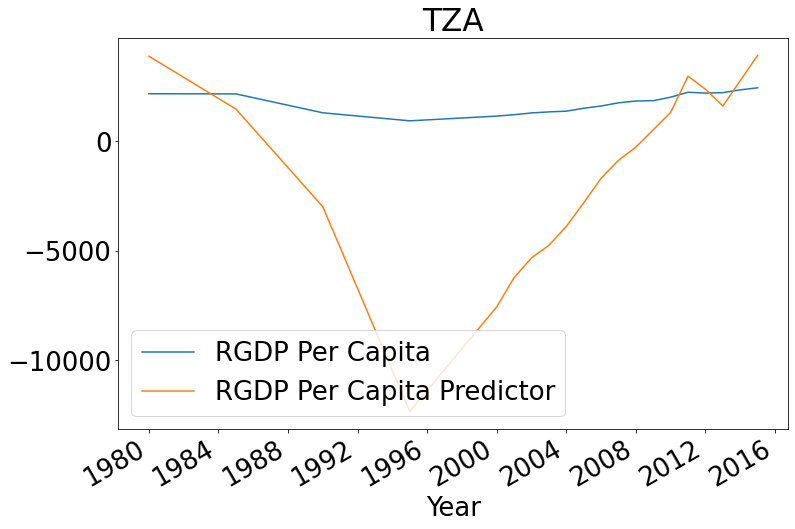

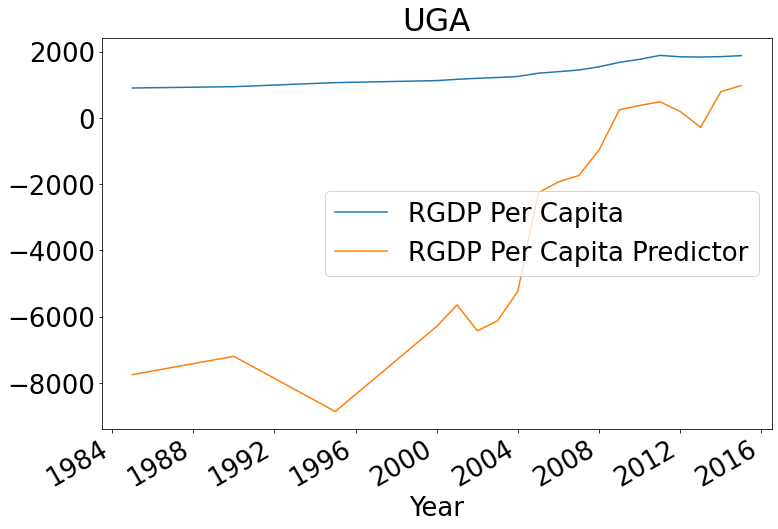

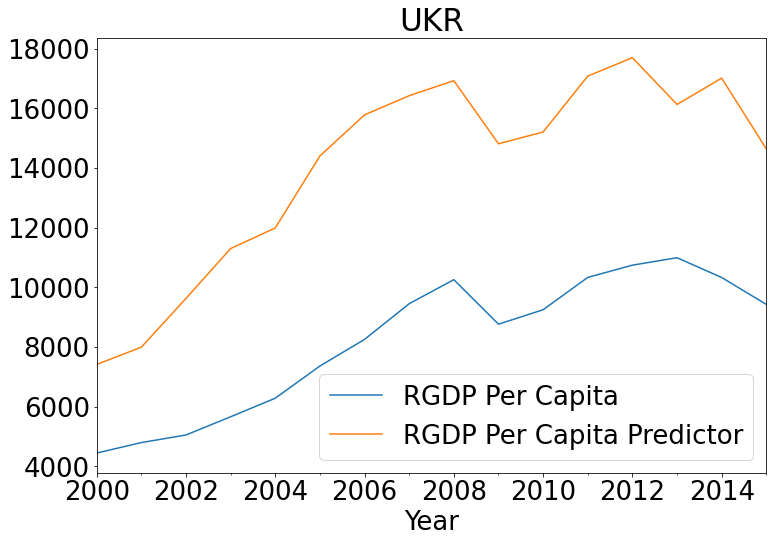

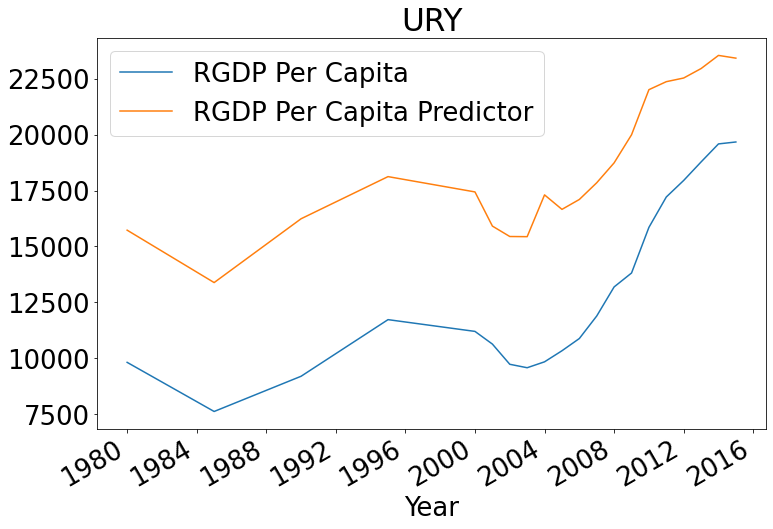

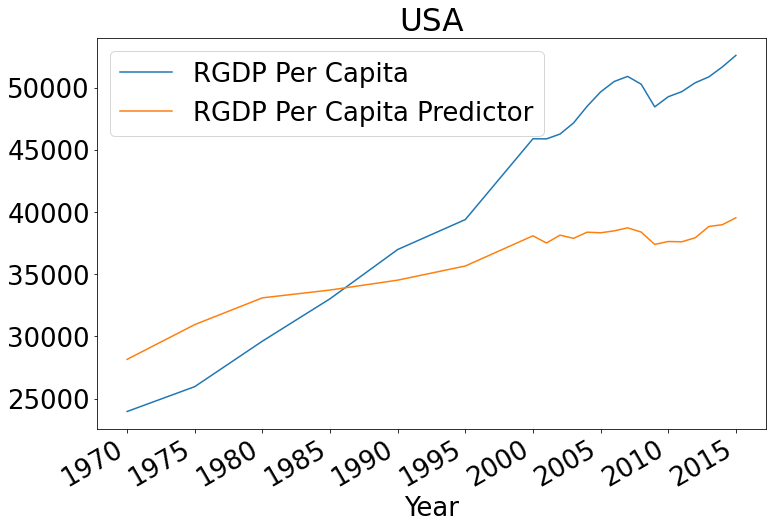

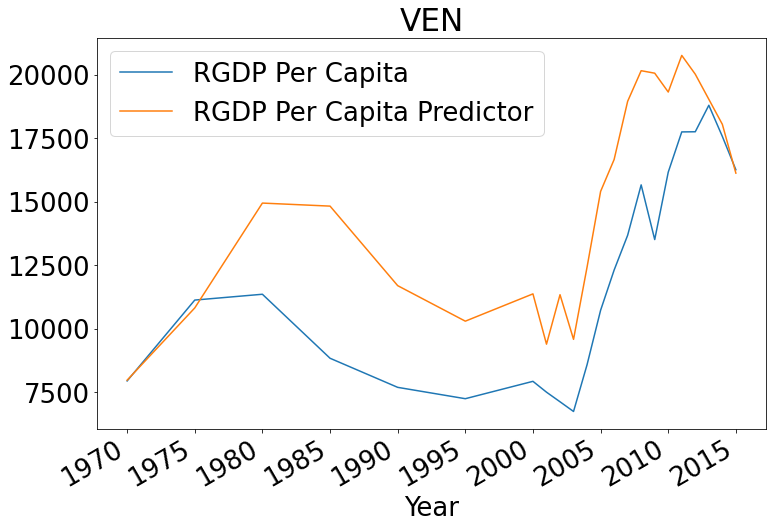

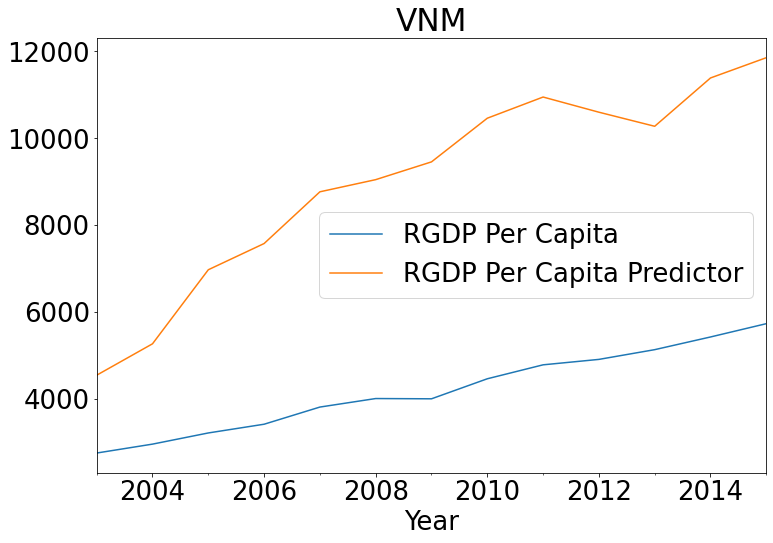

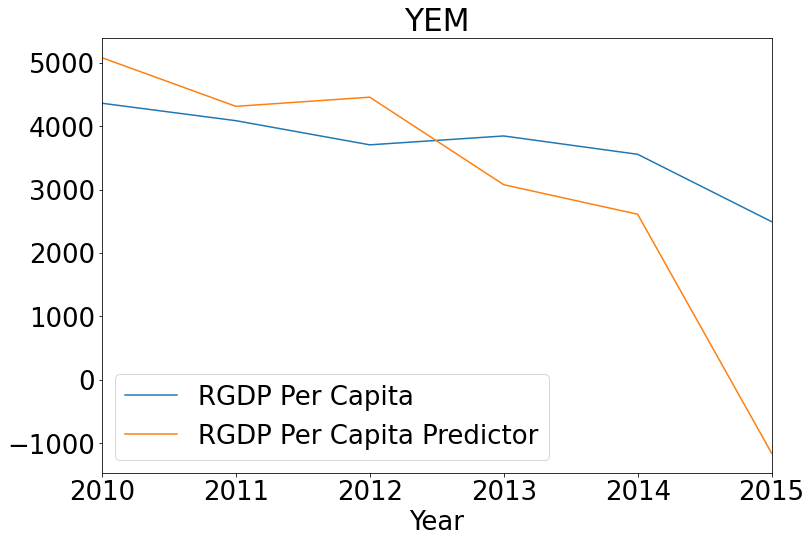

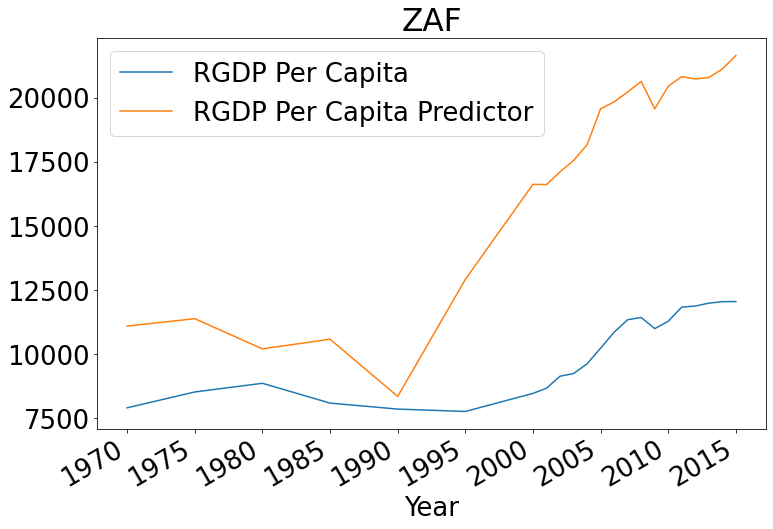

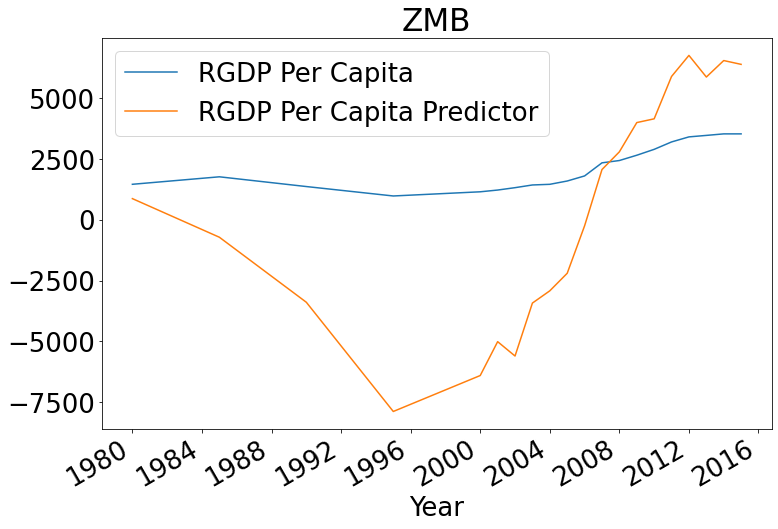

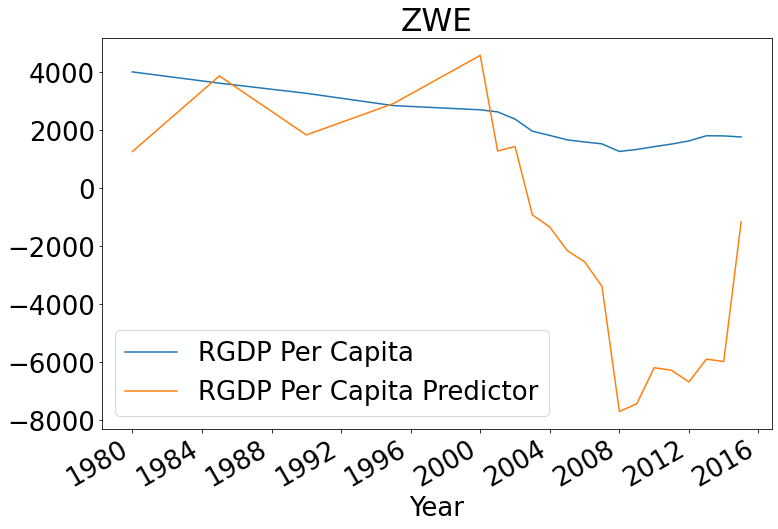

In [21]:
countries = reg_data.groupby("ISO_Code").mean().index
y_name, y_pred_name = y_var[0], y_var[0] + " Predictor"
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))
    reg_data[[y_name, y_pred_name]].loc[country].plot.line(ax = ax,
                                                          legend = True)
    ax.set_title(country)
    plt.plot()